# Oil Production Forecasting Using Machine Learning

#### Mahammad Salman Shaik (2215886)
#### Akram Mohammad  (2162967)
#### Imtiyaz Ali Syed (2220056)
#### Faisal Malik Mohammed (2214828)

## Import necessary libraries and Load the data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

# Load Volve production data from Excel file
volve_data = pd.read_excel('Volve production data.xlsx')




## Performing Exploratory Data Analytics

In [2]:
volve_data.head()

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                0.00000  ...              %    0.00000   
1            0.0                    NaN  ...              %    0.00000   
2            0.0                    NaN  ...              %    0.00000   
3            0.0                    NaN  ...              %    0.00000   
4            0.0              310.37614  ...              %   33.09788   

   AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
0    0.00000        0.00000          0.0           0.0           0.0   
1    0.00000        0.00000          0.0           0.0           0.0   
2    0.00000        0.00000          0.0           0.0           0.0   
3    0.00000        0.00000          0.0           0.0           0.0   
4   10.47992       33.07195          0.0           0.0           0.0   

   BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0          NaN  production         WI  
1          NaN  production         OP  
2          NaN  production         OP  
3          NaN  production         OP  
4          NaN  production         OP  

[5 rows x 24 columns]

In [3]:
# Print information about the data, including column names, data types, and non-null value counts
volve_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

In [4]:
# We can check the shape and columns of the data
print(volve_data.shape)
print(volve_data.columns)

(15634, 24)
Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')


In [5]:
# We can also check the data types of each column
print(volve_data.dtypes)

DATEPRD                     datetime64[ns]
WELL_BORE_CODE                      object
NPD_WELL_BORE_CODE                   int64
NPD_WELL_BORE_NAME                  object
NPD_FIELD_CODE                       int64
NPD_FIELD_NAME                      object
NPD_FACILITY_CODE                    int64
NPD_FACILITY_NAME                   object
ON_STREAM_HRS                      float64
AVG_DOWNHOLE_PRESSURE              float64
AVG_DOWNHOLE_TEMPERATURE           float64
AVG_DP_TUBING                      float64
AVG_ANNULUS_PRESS                  float64
AVG_CHOKE_SIZE_P                   float64
AVG_CHOKE_UOM                       object
AVG_WHP_P                          float64
AVG_WHT_P                          float64
DP_CHOKE_SIZE                      float64
BORE_OIL_VOL                       float64
BORE_GAS_VOL                       float64
BORE_WAT_VOL                       float64
BORE_WI_VOL                        float64
FLOW_KIND                           object
WELL_TYPE  

In [6]:
null_counts = volve_data.isnull().sum()

# Print the result
print(null_counts)

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64


In [7]:
# Generate summary statistics of the data, including count, mean, standard deviation, minimum, and maximum values
volve_data.describe()

NPD_WELL_BORE_CODE  NPD_FIELD_CODE  NPD_FACILITY_CODE  ON_STREAM_HRS  \
count        15634.000000         15634.0            15634.0   15349.000000   
mean          5908.581745       3420717.0           369304.0      19.994093   
std            649.231622             0.0                0.0       8.369978   
min           5351.000000       3420717.0           369304.0       0.000000   
25%           5599.000000       3420717.0           369304.0      24.000000   
50%           5693.000000       3420717.0           369304.0      24.000000   
75%           5769.000000       3420717.0           369304.0      24.000000   
max           7405.000000       3420717.0           369304.0      25.000000   

       AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
count            8980.000000               8980.000000    8980.000000   
mean              181.803869                 77.162969     154.028787   
std               109.712363                 45.657948      76.752373   
min                 0.000000                  0.000000       0.000000   
25%                 0.000000                  0.000000      83.665361   
50%               232.896939                103.186689     175.588861   
75%               255.401455                106.276591     204.319964   
max               397.588550                108.502178     345.906770   

       AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P    AVG_WHP_P    AVG_WHT_P  \
count        7890.000000       8919.000000  9155.000000  9146.000000   
mean           14.856100         55.168533    45.377811    67.728440   
std             8.406822         36.692924    24.752631    27.719028   
min             0.000000          0.000000     0.000000     0.000000   
25%            10.841437         18.952989    31.148062    56.577834   
50%            16.308598         52.096877    37.933620    80.071250   
75%            21.306125         99.924288    57.101268    88.062202   
max            30.019828        100.000000   137.311030    93.509584   

       DP_CHOKE_SIZE  BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL   BORE_WI_VOL  
count   15340.000000   9161.000000    9161.000000   9161.000000   5706.000000  
mean       11.441060   1095.631548  161049.059703   1672.151332   5315.480815  
std        19.816928   1323.538151  188136.410434   1706.982853   2181.486695  
min         0.000000      0.000000       0.000000   -457.840000      0.000000  
25%         0.000000    190.690000   29430.590000     19.870000   4338.204674  
50%         2.384969    557.550000   87749.660000   1097.790000   5504.739769  
75%        13.765020   1345.200000  202482.300000   3260.950000   6781.058040  
max       125.718570   5901.840000  851131.520000   8019.740000  10013.600000

In [8]:
# Calculate the correlation between the different columns of the data
volve_data.corr()


NPD_WELL_BORE_CODE  NPD_FIELD_CODE  \
NPD_WELL_BORE_CODE                  1.000000             NaN   
NPD_FIELD_CODE                           NaN             NaN   
NPD_FACILITY_CODE                        NaN             NaN   
ON_STREAM_HRS                      -0.102270             NaN   
AVG_DOWNHOLE_PRESSURE               0.257481             NaN   
AVG_DOWNHOLE_TEMPERATURE            0.339509             NaN   
AVG_DP_TUBING                       0.218243             NaN   
AVG_ANNULUS_PRESS                   0.141756             NaN   
AVG_CHOKE_SIZE_P                   -0.558461             NaN   
AVG_WHP_P                           0.077946             NaN   
AVG_WHT_P                          -0.519515             NaN   
DP_CHOKE_SIZE                       0.237647             NaN   
BORE_OIL_VOL                       -0.307645             NaN   
BORE_GAS_VOL                       -0.310793             NaN   
BORE_WAT_VOL                       -0.493591             NaN   
BORE_WI_VOL                        -0.055894             NaN   

                          NPD_FACILITY_CODE  ON_STREAM_HRS  \
NPD_WELL_BORE_CODE                      NaN      -0.102270   
NPD_FIELD_CODE                          NaN            NaN   
NPD_FACILITY_CODE                       NaN            NaN   
ON_STREAM_HRS                           NaN       1.000000   
AVG_DOWNHOLE_PRESSURE                   NaN      -0.003092   
AVG_DOWNHOLE_TEMPERATURE                NaN       0.105931   
AVG_DP_TUBING                           NaN       0.002824   
AVG_ANNULUS_PRESS                       NaN       0.482779   
AVG_CHOKE_SIZE_P                        NaN       0.531331   
AVG_WHP_P                               NaN      -0.044900   
AVG_WHT_P                               NaN       0.763229   
DP_CHOKE_SIZE                           NaN      -0.229295   
BORE_OIL_VOL                            NaN       0.342031   
BORE_GAS_VOL                            NaN       0.353713   
BORE_WAT_VOL                            NaN       0.405123   
BORE_WI_VOL                             NaN       0.749544   

                          AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
NPD_WELL_BORE_CODE                     0.257481                  0.339509   
NPD_FIELD_CODE                              NaN                       NaN   
NPD_FACILITY_CODE                           NaN                       NaN   
ON_STREAM_HRS                         -0.003092                  0.105931   
AVG_DOWNHOLE_PRESSURE                  1.000000                  0.967826   
AVG_DOWNHOLE_TEMPERATURE               0.967826                  1.000000   
AVG_DP_TUBING                          0.949734                  0.898954   
AVG_ANNULUS_PRESS                     -0.124023                 -0.087189   
AVG_CHOKE_SIZE_P                      -0.262804                 -0.295764   
AVG_WHP_P                              0.283359                  0.274247   
AVG_WHT_P                             -0.095114                 -0.076801   
DP_CHOKE_SIZE                          0.267649                  0.221986   
BORE_OIL_VOL                           0.248571                  0.289819   
BORE_GAS_VOL                           0.245981                  0.287328   
BORE_WAT_VOL                          -0.296765                 -0.343581   
BORE_WI_VOL                                 NaN                       NaN   

                          AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P  \
NPD_WELL_BORE_CODE             0.218243           0.141756         -0.558461   
NPD_FIELD_CODE                      NaN                NaN               NaN   
NPD_FACILITY_CODE                   NaN                NaN               NaN   
ON_STREAM_HRS                  0.002824           0.482779          0.531331   
AVG_DOWNHOLE_PRESSURE          0.949734          -0.124023         -0.262804   
AVG_DOWNHOLE_TEMPERATURE       0.898954          -0.087189         -0.295764   
AVG_DP_TUBIN

In [9]:
# Count the number of occurrences of each value in the 'WELL_BORE_CODE' column
print(volve_data['WELL_BORE_CODE'].value_counts())

NO 15/9-F-4 AH    3327
NO 15/9-F-5 AH    3306
NO 15/9-F-12 H    3056
NO 15/9-F-14 H    3056
NO 15/9-F-11 H    1165
NO 15/9-F-15 D     978
NO 15/9-F-1 C      746
Name: WELL_BORE_CODE, dtype: int64


<AxesSubplot:>

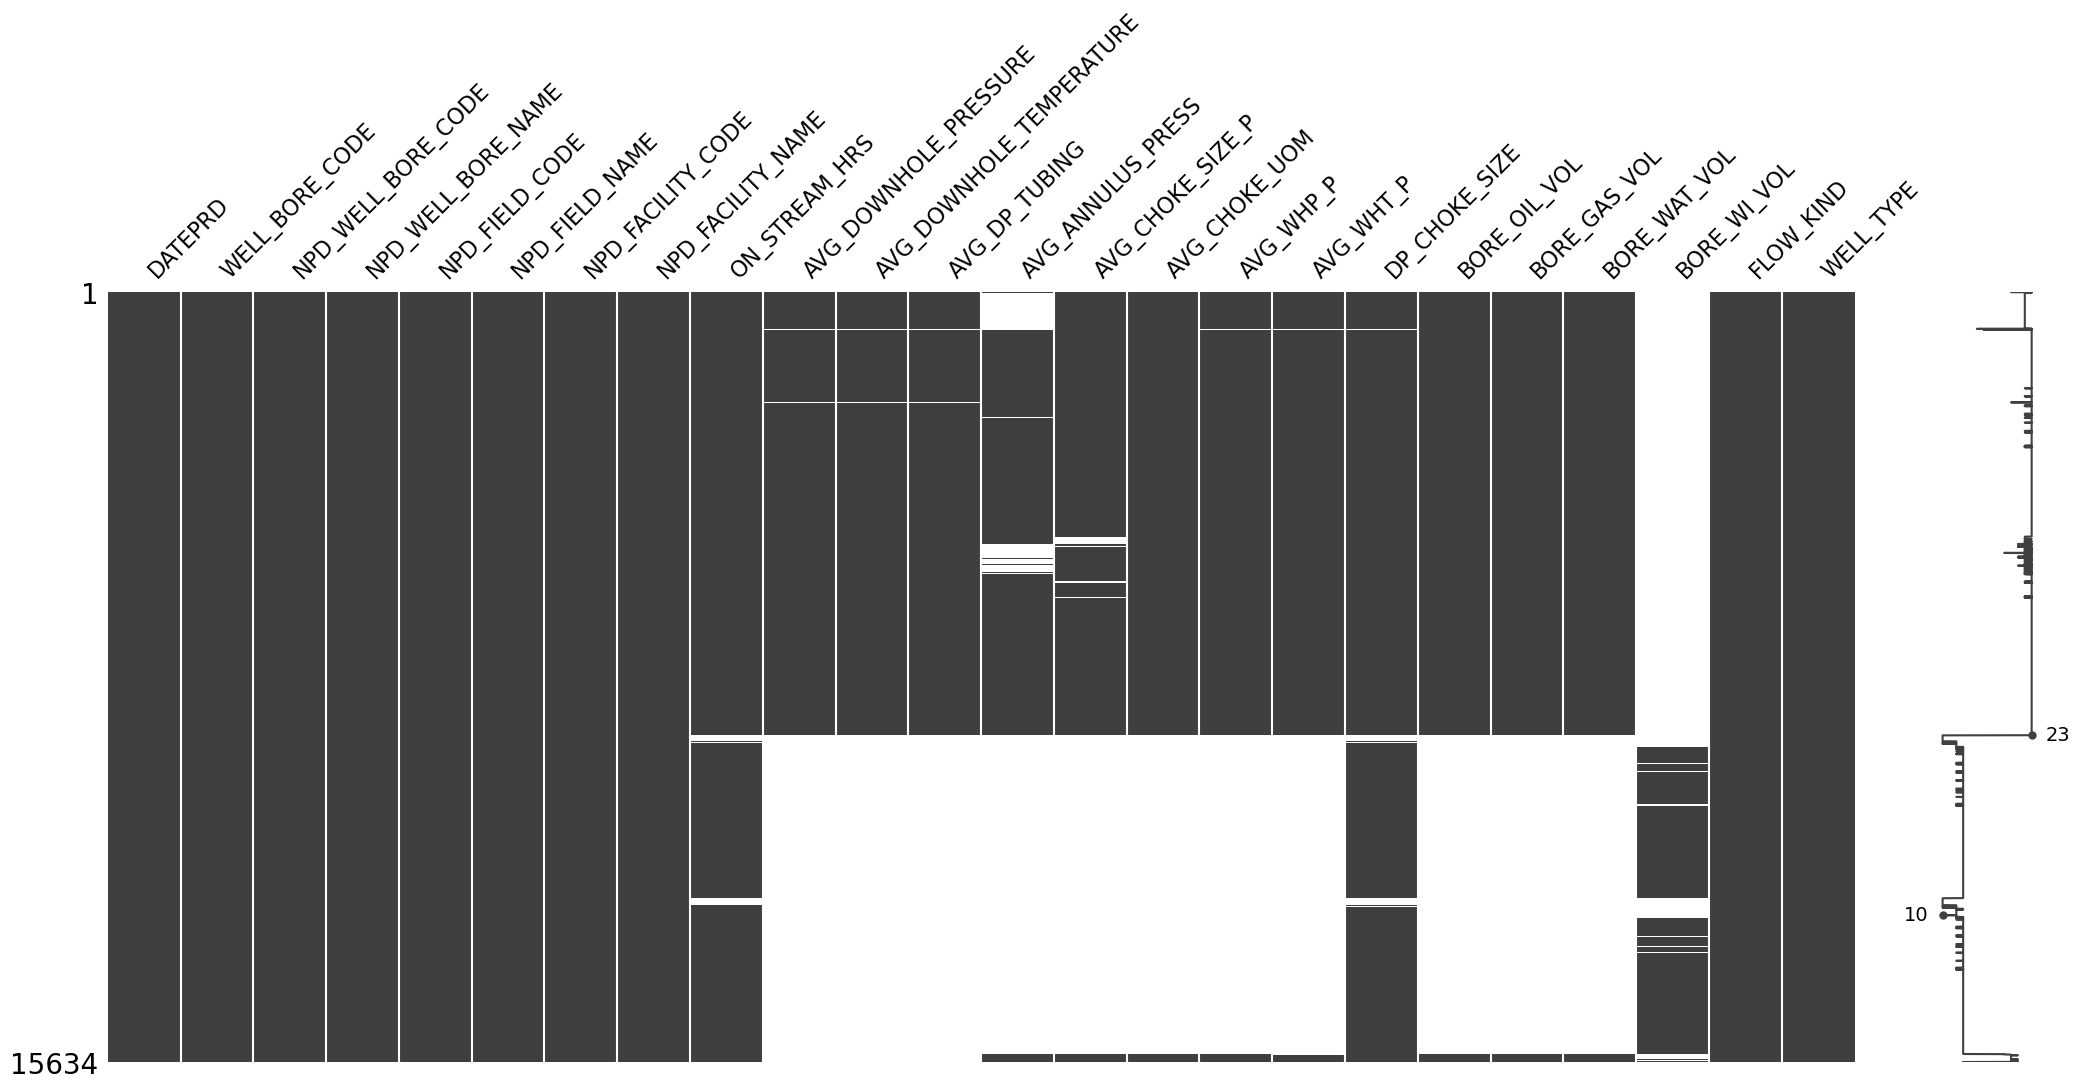

In [10]:
# Use the missingno library to visualize the missing data in the dataset
msno.matrix(volve_data)

In [11]:
print(volve_data['NPD_WELL_BORE_CODE'].value_counts())

5693    3327
5769    3306
5599    3056
5351    3056
7078    1165
7289     978
7405     746
Name: NPD_WELL_BORE_CODE, dtype: int64


In [12]:
# Filter the data by selecting rows where the 'NPD_WELL_BORE_CODE' column matches certain well codes
well_1_data = volve_data[volve_data['NPD_WELL_BORE_CODE'] == 7405]
well_2_data = volve_data[volve_data['NPD_WELL_BORE_CODE'] == 7078]
well_3_data = volve_data[volve_data['NPD_WELL_BORE_CODE'] == 5599]
well_4_data = volve_data[volve_data['NPD_WELL_BORE_CODE'] == 5351]
well_5_data = volve_data[volve_data['NPD_WELL_BORE_CODE'] == 7289]
well_6_data = volve_data[volve_data['NPD_WELL_BORE_CODE'] == 5693]
well_7_data = volve_data[volve_data['NPD_WELL_BORE_CODE'] == 5769]


In [13]:
print("Information about well 1:")
print(well_1_data.info())
print("")

print("Information about well 2:")
print(well_2_data.info())
print("")

print("Information about well 3:")
print(well_3_data.info())
print("")

print("Information about well 4:")
print(well_4_data.info())
print("")

print("Information about well 5:")
print(well_5_data.info())
print("")

print("Information about well 6:")
print(well_6_data.info())
print("")

print("Information about well 7:")
print(well_7_data.info())

Information about well 1:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 745
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   746 non-null    datetime64[ns]
 1   WELL_BORE_CODE            746 non-null    object        
 2   NPD_WELL_BORE_CODE        746 non-null    int64         
 3   NPD_WELL_BORE_NAME        746 non-null    object        
 4   NPD_FIELD_CODE            746 non-null    int64         
 5   NPD_FIELD_NAME            746 non-null    object        
 6   NPD_FACILITY_CODE         746 non-null    int64         
 7   NPD_FACILITY_NAME         746 non-null    object        
 8   ON_STREAM_HRS             746 non-null    float64       
 9   AVG_DOWNHOLE_PRESSURE     743 non-null    float64       
 10  AVG_DOWNHOLE_TEMPERATURE  743 non-null    float64       
 11  AVG_DP_TUBING             743 non-null    float64       
 

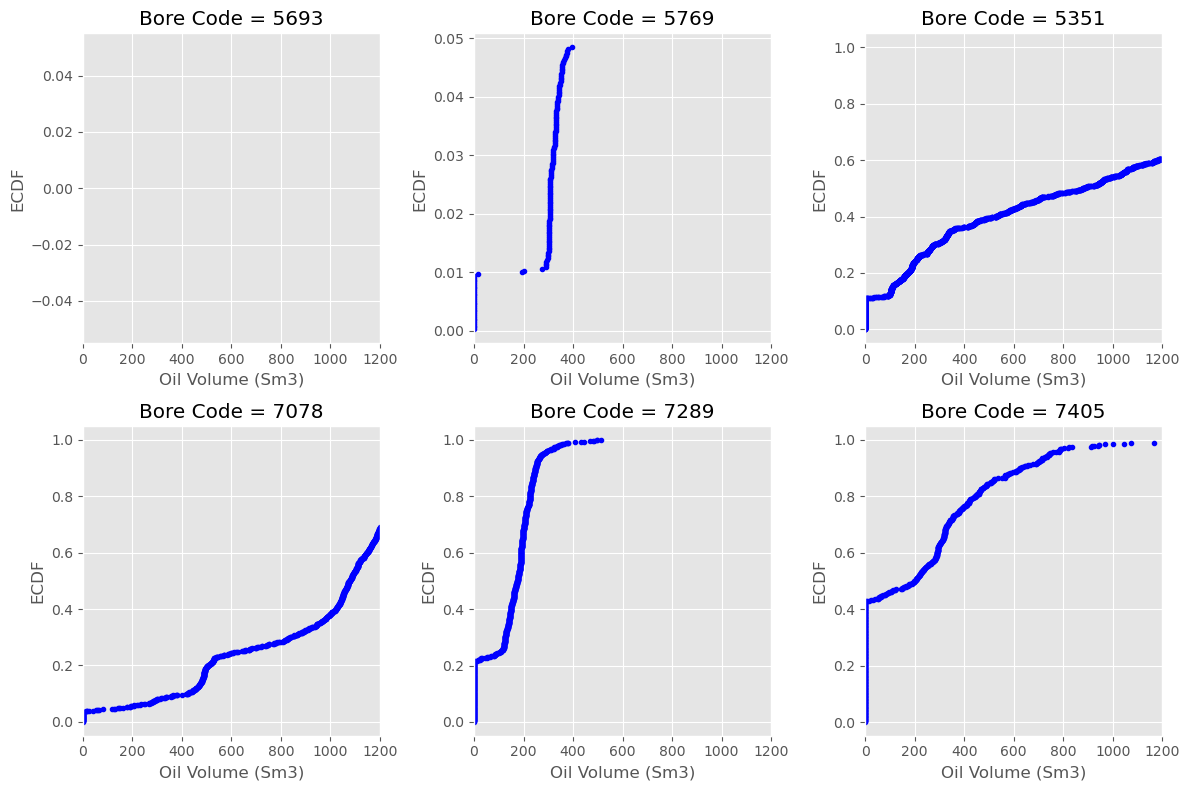

In [14]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Define function for creating ECDF plot
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

# Create subplots for all wells
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()  # flatten the array of subplots

# Loop through wells and plot ECDF
wells = [5693, 5769, 5351, 7078, 7289, 7405]
for i, well in enumerate(wells):
    well_data = volve_data[volve_data['NPD_WELL_BORE_CODE'] == well]
    x_axis, y_axis = ecdf(well_data['BORE_OIL_VOL'])
    axs[i].plot(x_axis, y_axis, marker=".", linestyle="none", color='blue')
    axs[i].set_xlabel('Oil Volume (Sm3)')
    axs[i].set_ylabel('ECDF')
    axs[i].set_title(f'Bore Code = {well}')
    axs[i].set_xlim([0, 1200]) # set limit for x-axis
    
plt.tight_layout()
plt.show()


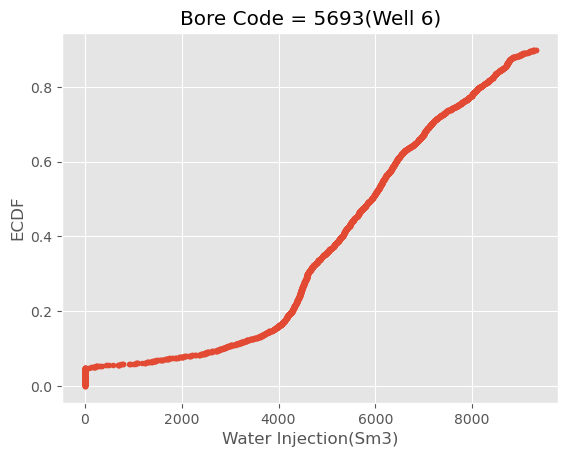

In [15]:
x_axis, y_axis = ecdf(well_6_data['BORE_WI_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Water Injection(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5693(Well 6)')

plt.show()

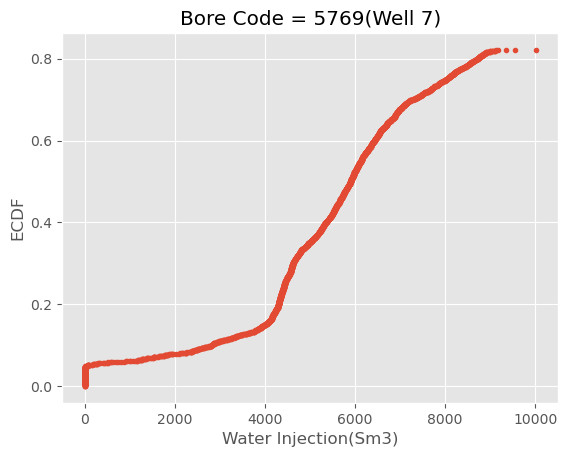

In [16]:
x_axis, y_axis = ecdf(well_7_data['BORE_WI_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Water Injection(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5769(Well 7)')

plt.show()

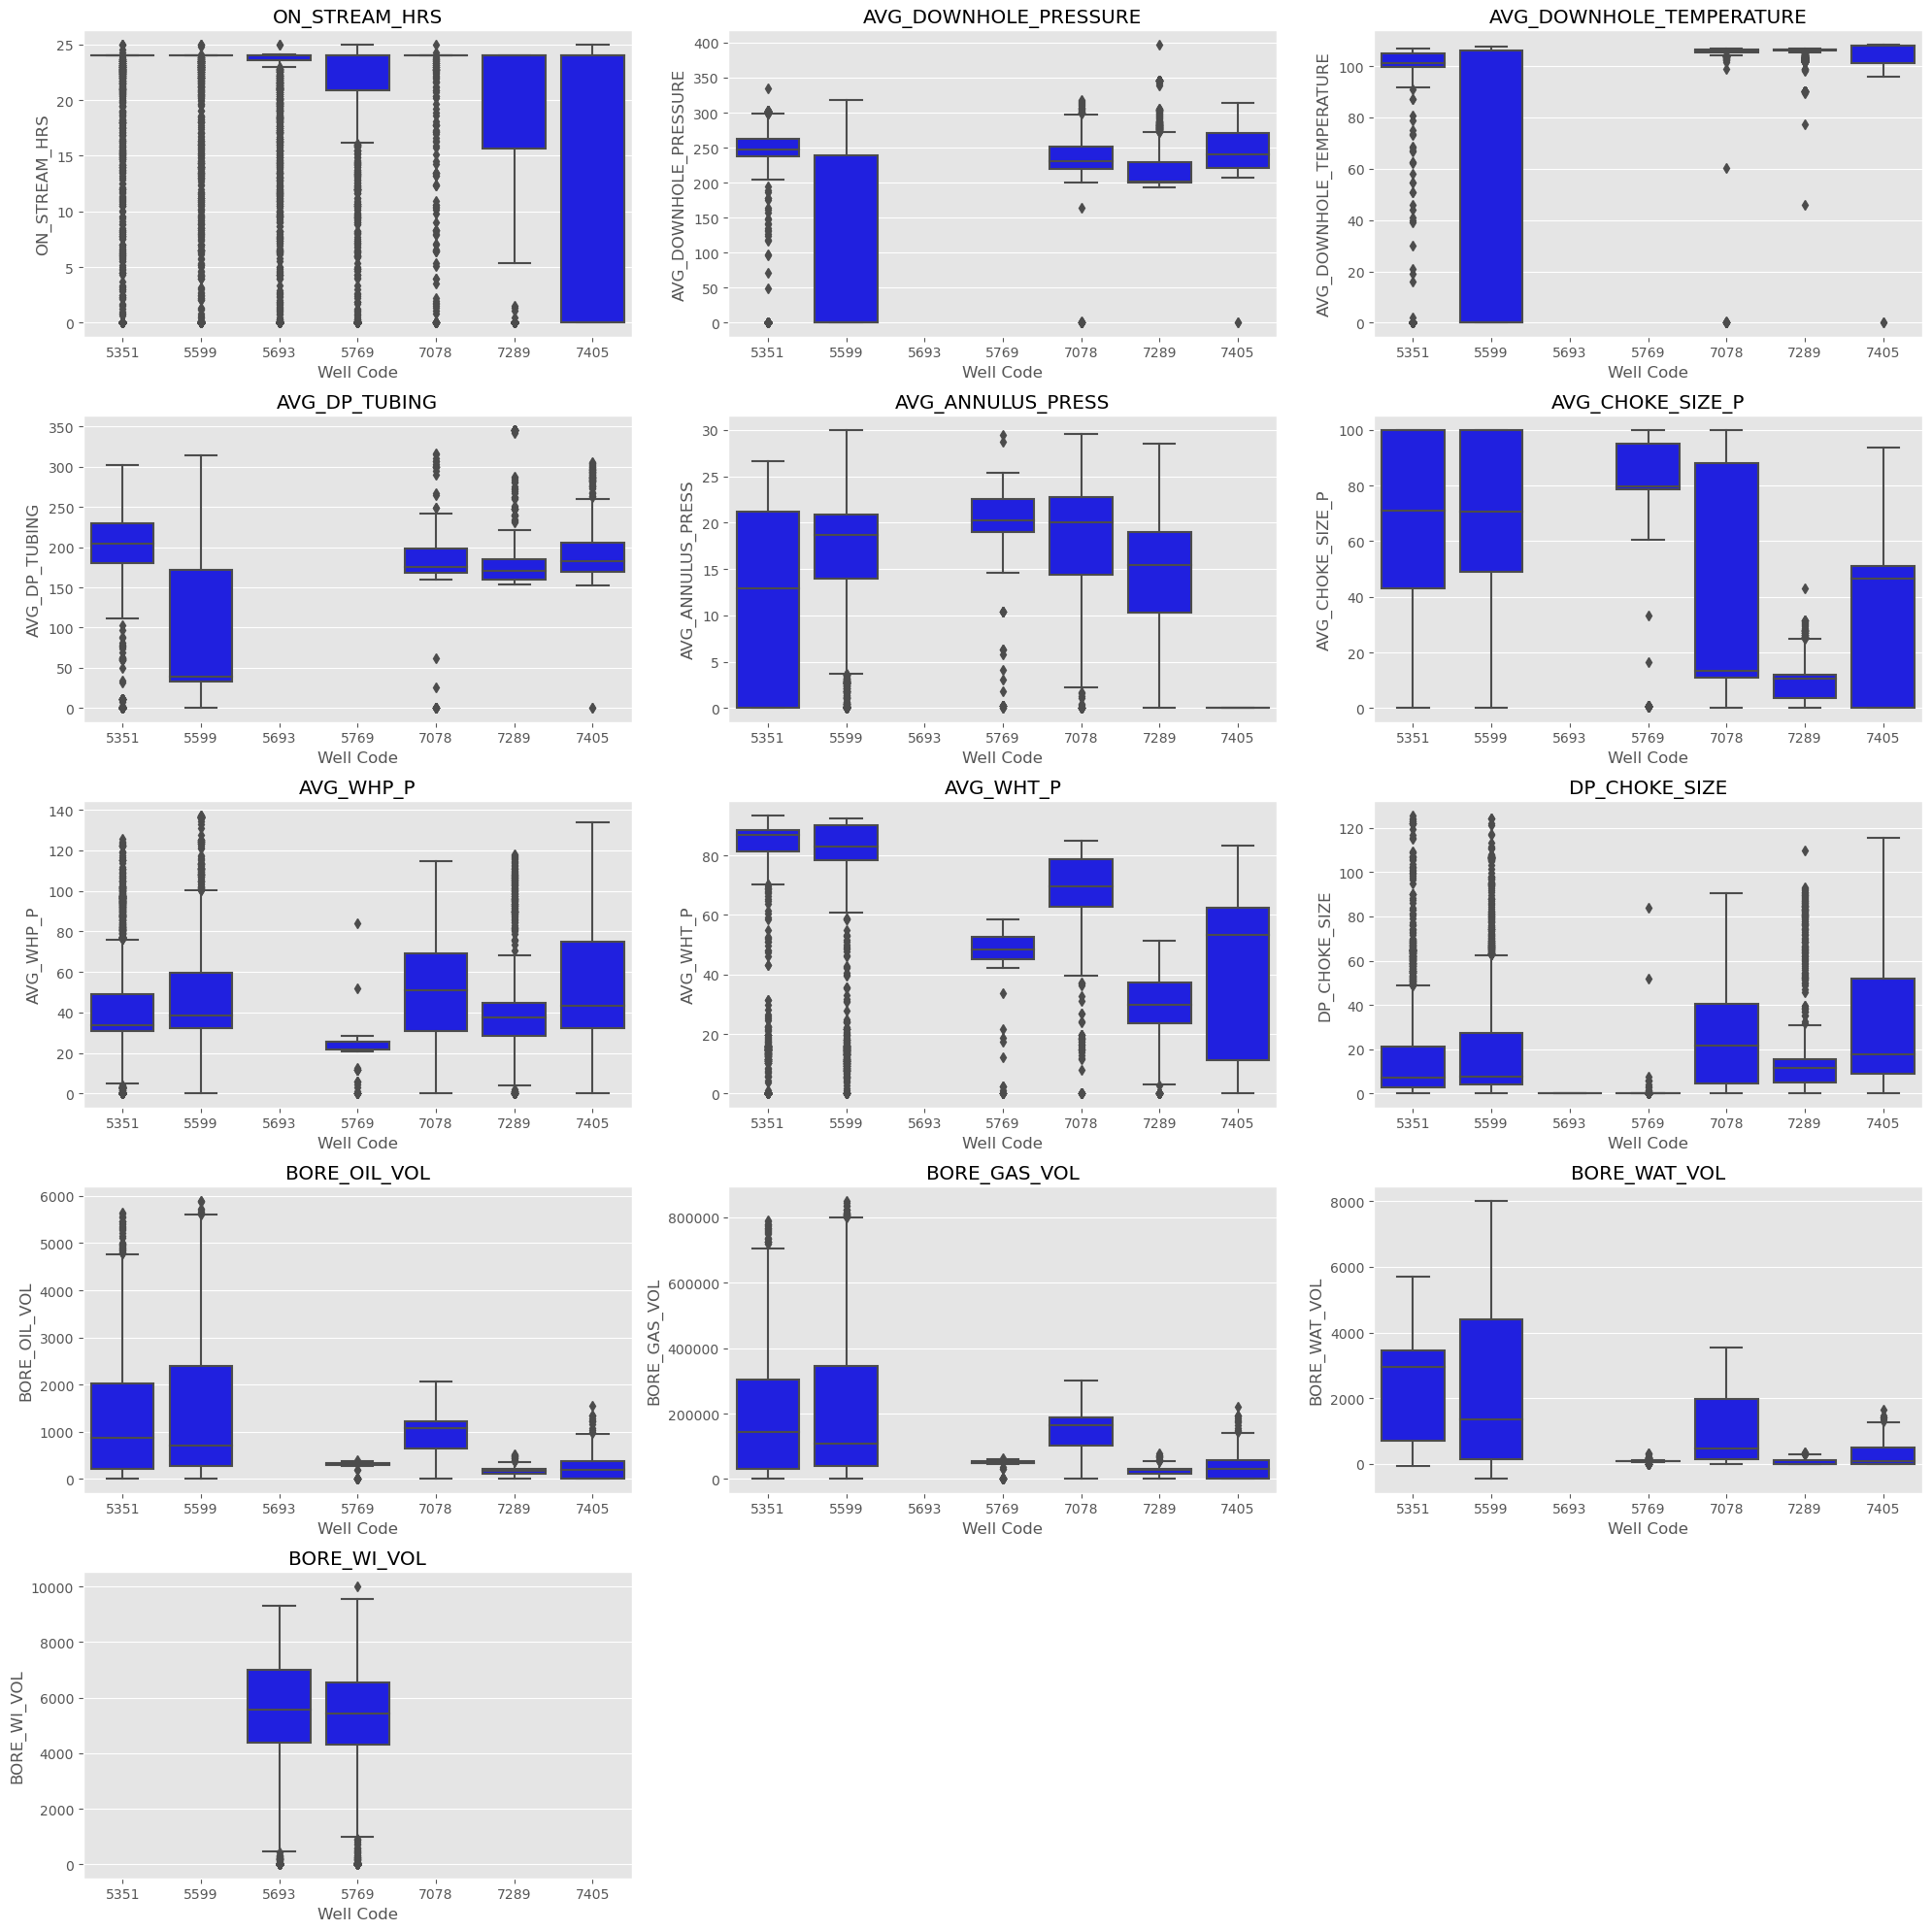

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

columns = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
           'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P',
           'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL',
           'BORE_GAS_VOL', 'BORE_WAT_VOL', 'BORE_WI_VOL']

for i, col in enumerate(columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x='NPD_WELL_BORE_CODE', y=col, data=volve_data, color='blue')
    plt.xlabel('Well Code')
    plt.ylabel(col)
    plt.title(col)

plt.tight_layout()
plt.show()


<AxesSubplot:>

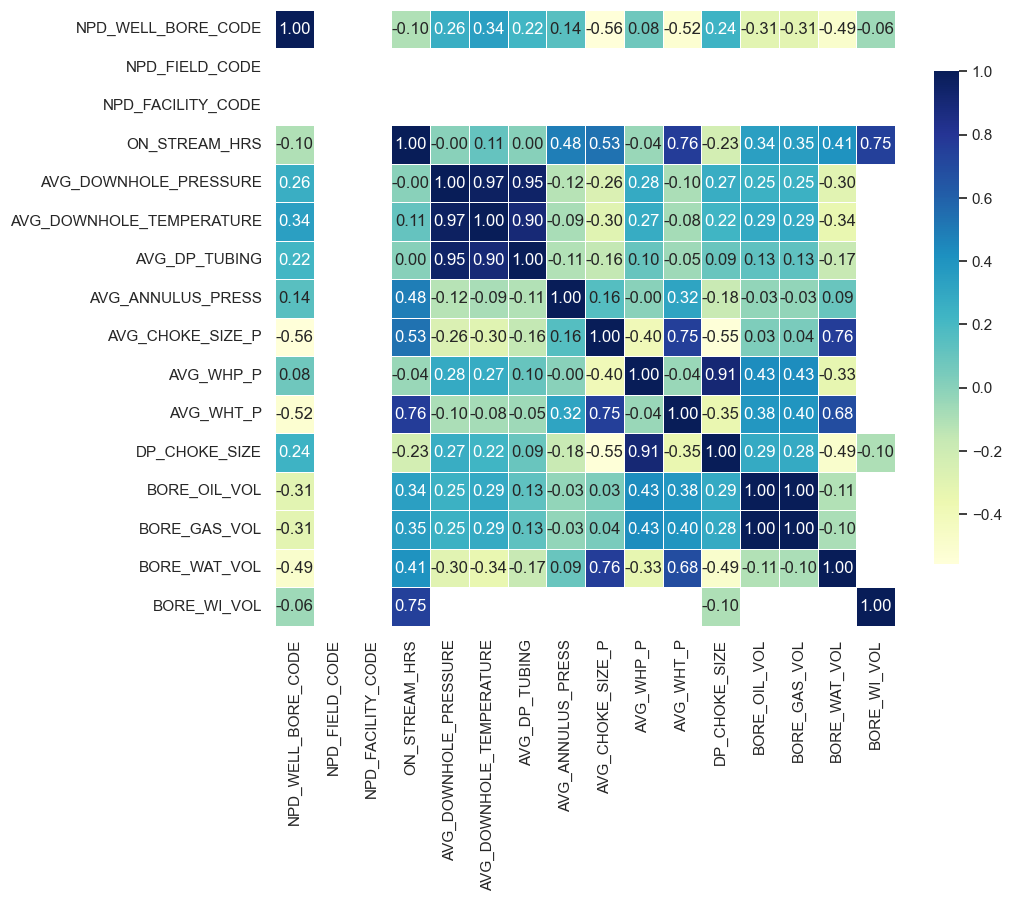

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
corr_matrix = volve_data.corr()

# Set up figure size and style
sns.set(style="white")
plt.figure(figsize=(10, 8))

# Create correlation plot
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5, cbar_kws={"shrink": .8})





## Performing Linear Regression

### Import necessary libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
from matplotlib import pyplot as plt




### Load data


In [20]:
df = pd.read_excel('Volve production data.xlsx')

### Round data to nearest integer


In [21]:
df = np.round(df)

### Interpolate missing values


In [22]:
cols_to_interpolate = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
                       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE',
                       'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
df[cols_to_interpolate] = df[cols_to_interpolate].interpolate(method='linear')

### Drop unnecessary columns

In [23]:
cols_to_drop = ['WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'NPD_FIELD_NAME', 'NPD_FIELD_CODE', 'NPD_FACILITY_CODE',
                'NPD_FACILITY_NAME', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING', 'BORE_WI_VOL', 'AVG_CHOKE_UOM',
                'FLOW_KIND', 'WELL_TYPE', 'BORE_GAS_VOL']
df.drop(cols_to_drop, axis=1, inplace=True)

### Scale dataset

In [24]:
cols_to_scale = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P',
                 'AVG_WHT_P']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

### Select data for wells 5599, 5351, 7078


In [25]:
df = df.loc[df['NPD_WELL_BORE_CODE'].isin([5599, 5351, 7078])]

### Split data into training and testing sets


In [26]:
X = df.drop(['BORE_OIL_VOL'],axis=1)
y= df[['BORE_OIL_VOL','NPD_WELL_BORE_CODE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train a linear regression model


In [27]:
reg_linear = LinearRegression()
x_train_final = X_train.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)
x_test_final = X_test.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)
y_test_final = y_test['BORE_OIL_VOL']
y_train_final = y_train['BORE_OIL_VOL']
reg_linear.fit(x_train_final, y_train_final)

LinearRegression()

### Use the model to predict oil production for the test data


In [28]:
y_pred_linear = reg_linear.predict(x_test_final)

### Calculate the Performance Metrics

In [29]:
# Calculate R-squared score to evaluate the model's performance
r2 = r2_score(y_test_final, y_pred_linear)
print('R-squared score of Linear Regression Model is :', r2)

# Calculate mean absolute error
mae = mean_absolute_error(y_test_final, y_pred_linear)
print('Mean absolute error of Linear Regression Model is :', mae)

# Calculate root mean squared error
rmse = math.sqrt(mean_squared_error(y_test_final, y_pred_linear))
print('Root mean squared error of linear Regression Model:', rmse)
# Calculate mean squared error
mse = mean_squared_error(y_test_final, y_pred_linear)
print('mean squared error of Linear Regression Model is :', mse)



R-squared score of Linear Regression Model is : 0.554546213401562
Mean absolute error of Linear Regression Model is : 705.8758754656305
Root mean squared error of linear Regression Model: 913.4242223150642
mean squared error of Linear Regression Model is : 834343.8099118797


## Plot actual vs predicted values for Linear Regression Model

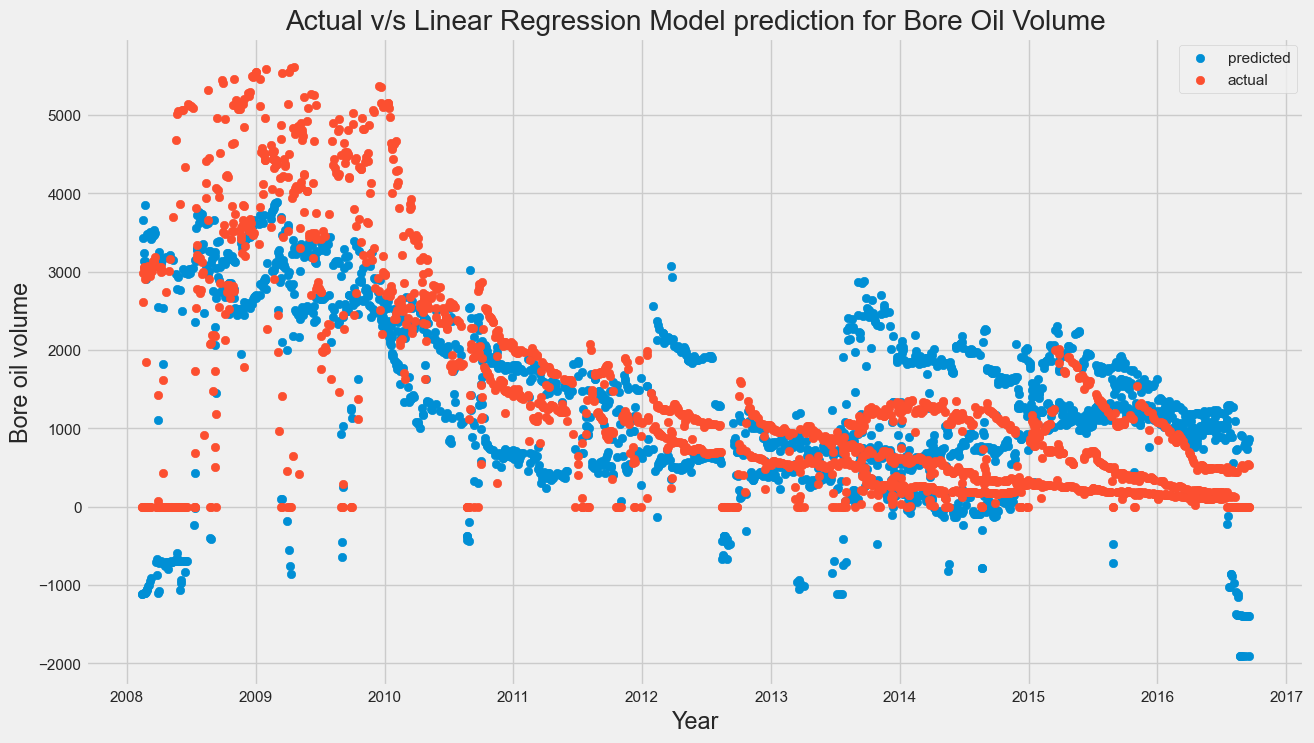

In [30]:
# Plot actual vs predicted values
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test["DATEPRD"].tolist(), y_pred_linear, label='predicted')
plt.scatter(X_test["DATEPRD"].tolist(), y_test_final, label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume')

# Show plot
plt.show()


### Plotting the actual vs Predicted values for Each Well Individually

#### Plot actual vs predicted values for 5599

The R2 value for linear regression for oil volume production in well 5599 is 0.550247303910232


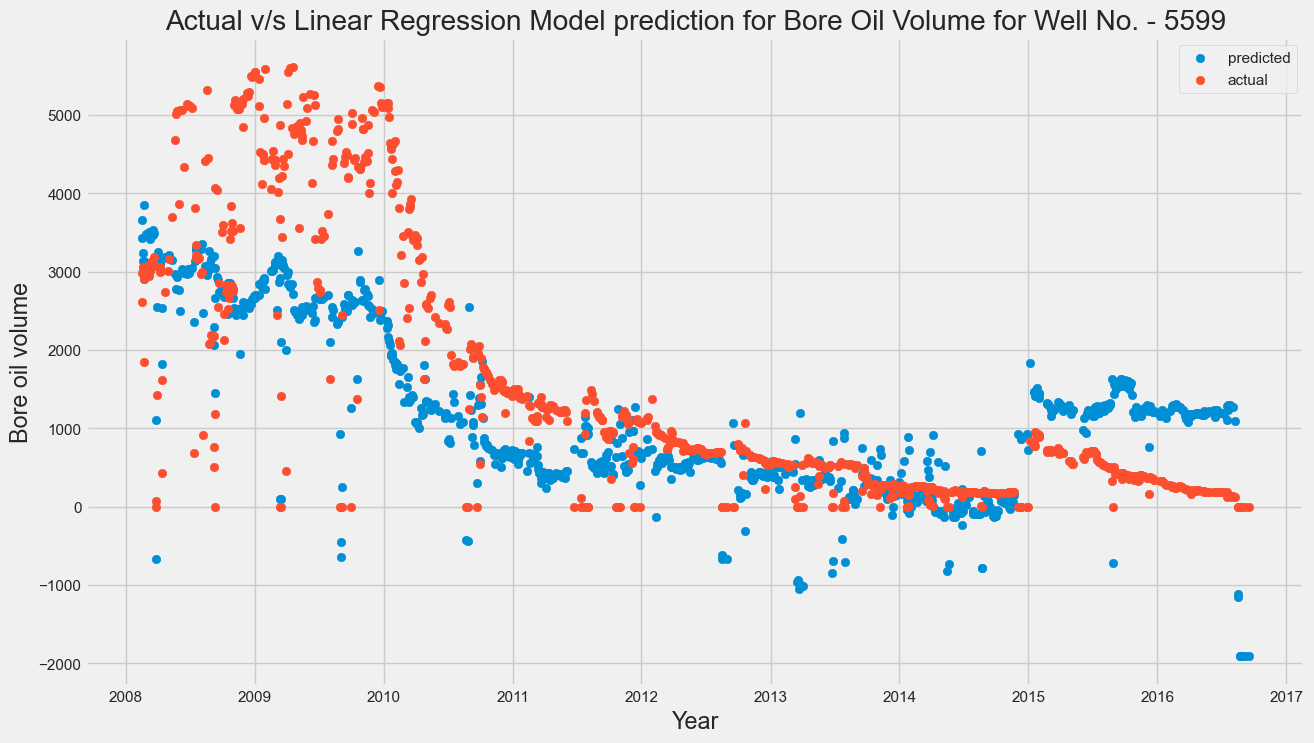

In [31]:
# Select data for well 5599
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]
y_test_5599 = y_test[y_test['NPD_WELL_BORE_CODE'] == 5599]
x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

# Predict values
y_pred_linear = reg_linear.predict(x_test_5599final)

# Plot actual vs predicted values
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_pred_linear,label='predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5599')

# Evaluate performance
y_test_5599_final = y_test_5599['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 5599 is", reg_linear.score(x_test_5599final, y_test_5599_final))

#### Plotting Actual vs predicted values for Well 5351

The R2 value for linear regression for oil volume production in well 5351 is 0.6742749337876078


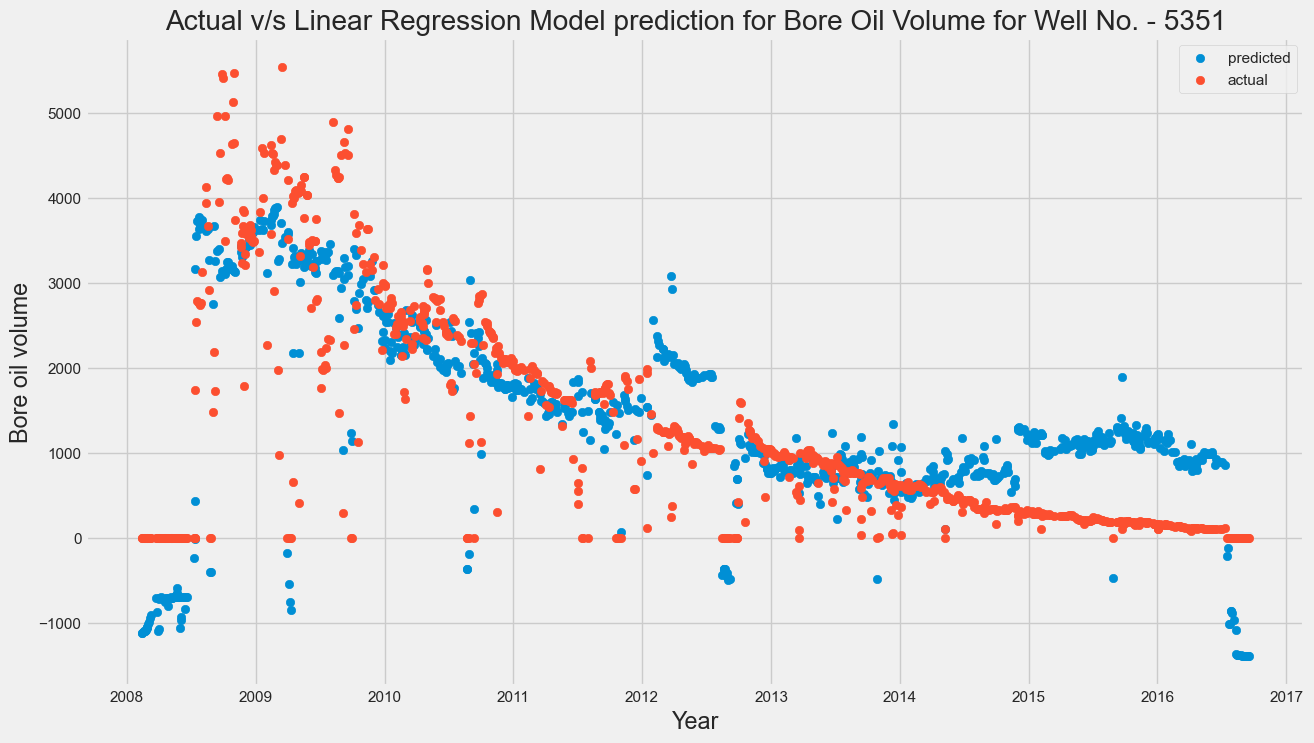

In [32]:
# Select data for well 5351
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]
y_test_5351 = y_test[y_test['NPD_WELL_BORE_CODE'] == 5351]
x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

# Predict values
y_pred_linear = reg_linear.predict(x_test_5351final)

# Plot actual vs predicted values
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_pred_linear,label='predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5351')

# Evaluate performance
y_test_5351_final = y_test_5351['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 5351 is", reg_linear.score(x_test_5351final, y_test_5351_final))


#### Plotting Actual vs predicted values for Well 7078

Text(0.5, 1.0, 'Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 7078')

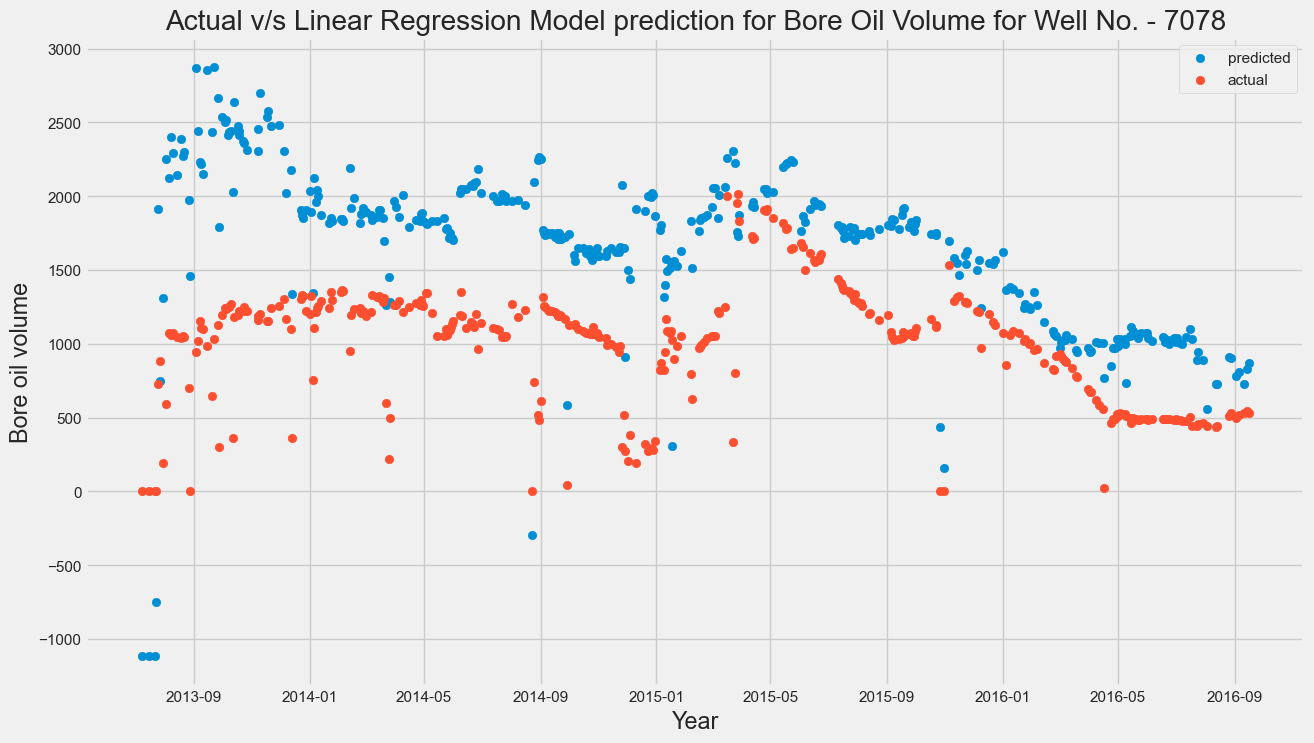

In [33]:
# Select data for well 7078
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]
y_test_7078 = y_test[y_test['NPD_WELL_BORE_CODE'] == 7078]
x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

# Predict using the trained model
y_pred_linear = reg_linear.predict(x_test_7078final)

# Plot actual vs predicted values
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(), y_pred_linear, label='predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(), y_test_7078['BORE_OIL_VOL'], label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 7078')

# Polynomial regression

### Importing any necessary libraries

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Create polynomial features of degree 2


In [35]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train_final)
x_test_poly = poly.transform(x_test_final)


### Fit linear regression model


In [36]:
reg_poly = LinearRegression()
reg_poly.fit(x_train_poly, y_train_final)

LinearRegression()

### Predict on test data


In [37]:
y_pred_poly = reg_poly.predict(x_test_poly)

### Calculating Performance metrics for Polynomial Regression

In [38]:
# Calculate R-squared score
r2_poly = r2_score(y_test_final, y_pred_poly)
print('R-squared score of Ploynomial Regression is :', r2_poly)

# Calculate mean absolute error
mae_poly = mean_absolute_error(y_test_final, y_pred_poly)
print('Mean absolute error of Ploynomial Regression is :', mae_poly)

#Calculate mean squared error
mse_poly = mean_squared_error(y_test_final, y_pred_poly)
print('Mean squared error of Ploynomial Regression is :', mse_poly)
# Calculate root mean squared error
rmse_poly = math.sqrt(mean_squared_error(y_test_final, y_pred_poly))
print('Root mean squared error of Ploynomial Regression is :', rmse_poly)

R-squared score of Ploynomial Regression is : 0.9301328617036829
Mean absolute error of Ploynomial Regression is : 250.37863563033665
Mean squared error of Ploynomial Regression is : 130862.54086855218
Root mean squared error of Ploynomial Regression is : 361.7492790159397


### Plotting Actual vs Predicted values for Polynomial Regression

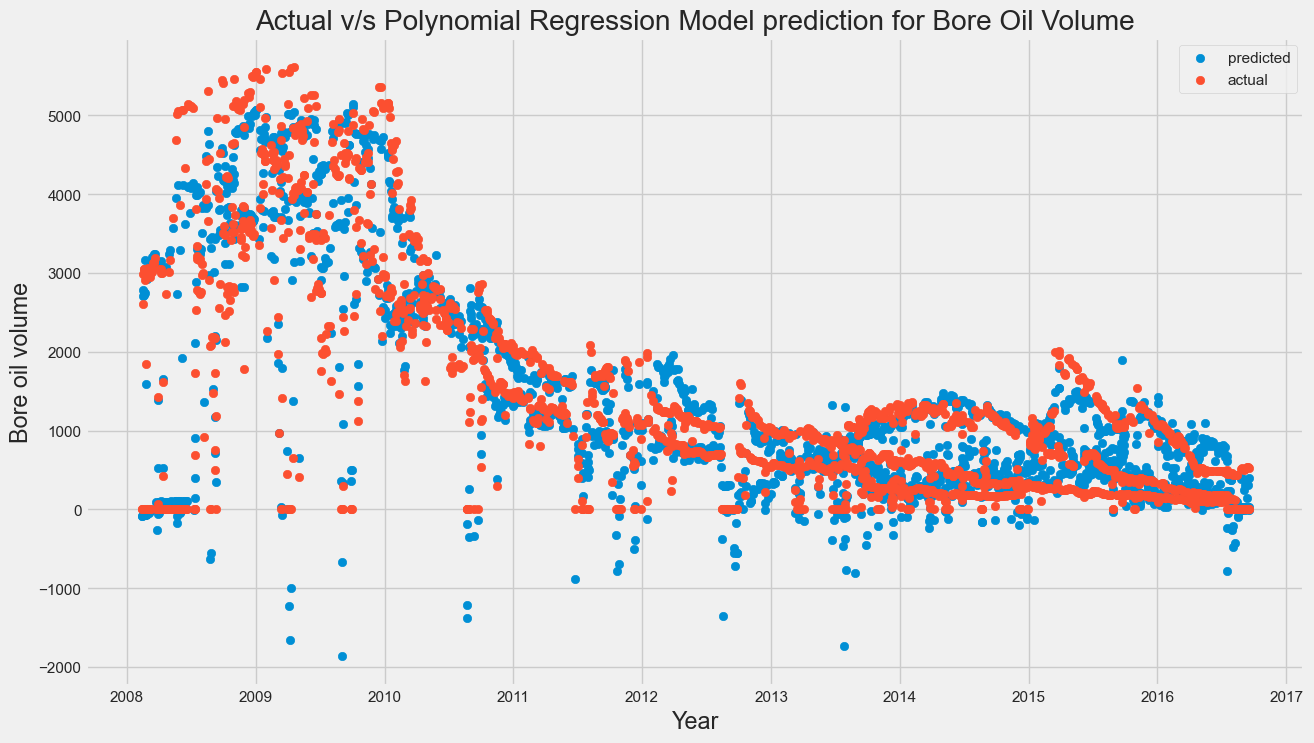

In [39]:
# Plot actual vs predicted values
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn')
plt.figure(figsize=(14, 8))
plt.scatter(X_test['DATEPRD'], y_pred_poly, label='predicted')
plt.scatter(X_test['DATEPRD'], y_test_final, label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Polynomial Regression Model prediction for Bore Oil Volume')

# Show plot
plt.show()


### Plotting Actual vs predicted values for each Well

#### Plotting for well 5599

Text(0.5, 1.0, 'Actual v/s Polynomial Regression Model prediction for Bore Oil Volume for Well No. - 5599')

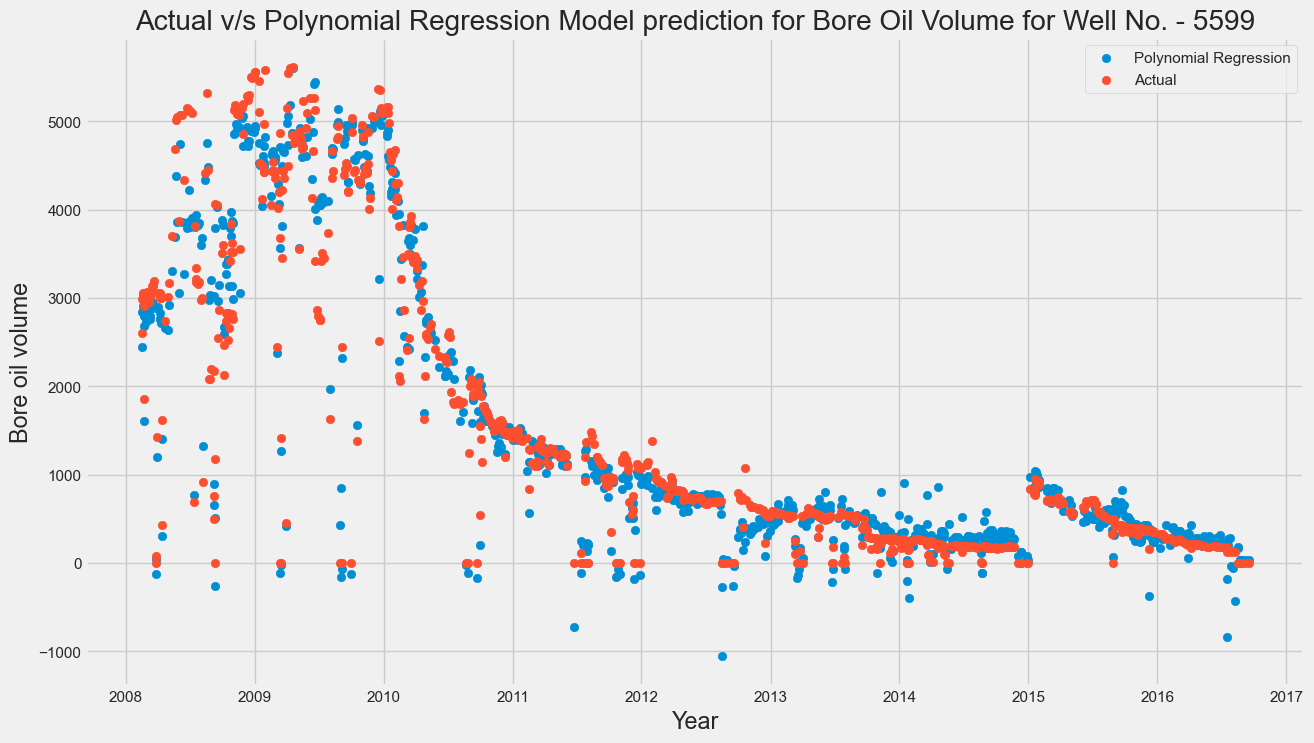

In [40]:
# Perform polynomial regression for well 5599
poly = PolynomialFeatures(degree=2)
x_poly_5599 = poly.fit_transform(x_test_5599final)
reg_poly = LinearRegression()
reg_poly.fit(x_poly_5599, y_test_5599_final)
y_pred_poly = reg_poly.predict(poly.fit_transform(x_test_5599final))

# Plot actual vs predicted values
plt.figure(figsize=(14, 8))
plt.scatter(X_test_5599["DATEPRD"].tolist(), y_pred_poly, label='Polynomial Regression')
plt.scatter(X_test_5599["DATEPRD"].tolist(), y_test_5599['BORE_OIL_VOL'], label='Actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Polynomial Regression Model prediction for Bore Oil Volume for Well No. - 5599')

#### Plotting for Well 5351

Text(0.5, 1.0, 'Actual v/s Polynomial Regression Model prediction for Bore Oil Volume for Well No. - 5351')

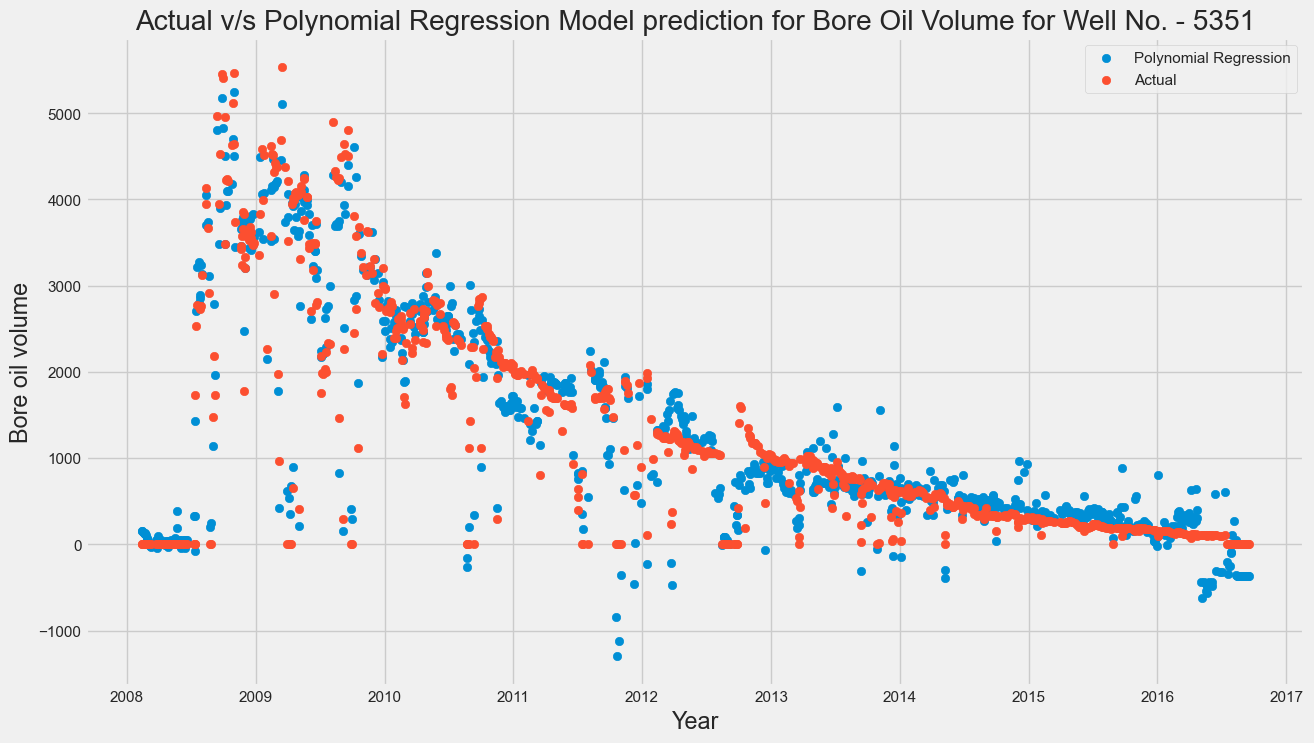

In [41]:
# Perform polynomial regression for well 5351
poly = PolynomialFeatures(degree=2)
x_poly_5351 = poly.fit_transform(x_test_5351final)
reg_poly = LinearRegression()
reg_poly.fit(x_poly_5351, y_test_5351_final)
y_pred_poly = reg_poly.predict(poly.fit_transform(x_test_5351final))

# Plot actual vs predicted values
plt.figure(figsize=(14, 8))
plt.scatter(X_test_5351["DATEPRD"].tolist(), y_pred_poly, label='Polynomial Regression')
plt.scatter(X_test_5351["DATEPRD"].tolist(), y_test_5351['BORE_OIL_VOL'], label='Actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Polynomial Regression Model prediction for Bore Oil Volume for Well No. - 5351')

#### Plotting for Well 7078

Text(0.5, 1.0, 'Actual v/s Polynomial Regression Model prediction for Bore Oil Volume for Well No. - 7078')

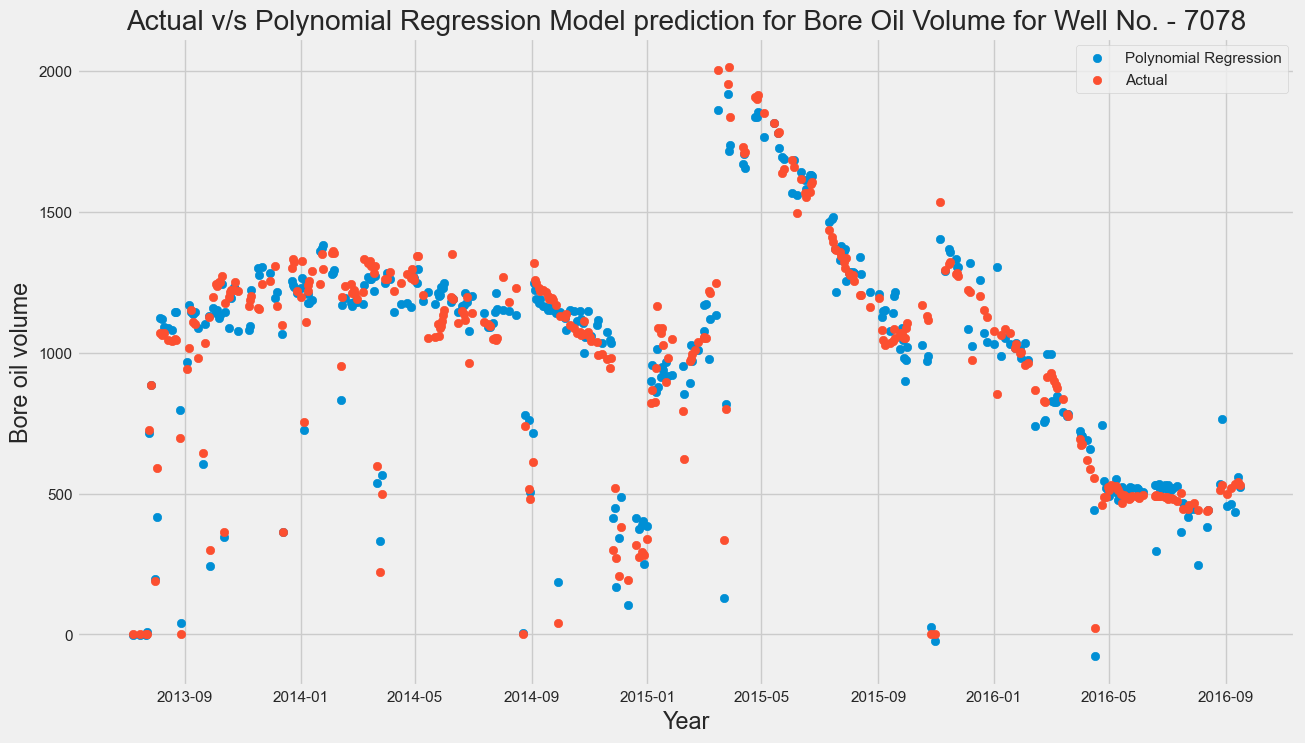

In [42]:
poly = PolynomialFeatures(degree=2)
y_test_7078_final = y_test_7078['BORE_OIL_VOL']
x_poly_7078 = poly.fit_transform(x_test_7078final)
reg_poly = LinearRegression()
reg_poly.fit(x_poly_7078, y_test_7078_final)
y_pred_poly = reg_poly.predict(poly.fit_transform(x_test_7078final))

# Plot actual vs predicted values
plt.figure(figsize=(14, 8))
plt.scatter(X_test_7078["DATEPRD"].tolist(), y_pred_poly, label='Polynomial Regression')
plt.scatter(X_test_7078["DATEPRD"].tolist(), y_test_7078['BORE_OIL_VOL'], label='Actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Polynomial Regression Model prediction for Bore Oil Volume for Well No. - 7078')

## XGBOOST 


### Import the Libraries

In [43]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




### Load the data

In [44]:
df = pd.read_excel('Volve production data.xlsx')

### Round data to nearest integer

In [45]:
# Round data to nearest integer
df = np.round(df)


### Convert date to Unix timestamp

In [46]:
# Convert date to Unix timestamp
df['DATEPRD'] = pd.to_datetime(df['DATEPRD'])
df['DATEPRD'] = (df['DATEPRD'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

### Interpolate missing values

In [47]:
# Interpolate missing values
cols_to_interpolate = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
                       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE',
                       'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
df[cols_to_interpolate] = df[cols_to_interpolate].interpolate(method='linear')


### Drop unnecessary columns

In [48]:
# Drop unnecessary columns
cols_to_drop = ['WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'NPD_FIELD_NAME', 'NPD_FIELD_CODE', 'NPD_FACILITY_CODE',
                'NPD_FACILITY_NAME', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING', 'BORE_WI_VOL', 'AVG_CHOKE_UOM',
                'FLOW_KIND', 'WELL_TYPE', 'BORE_GAS_VOL']
df.drop(cols_to_drop, axis=1, inplace=True)

### Select data for wells 5599,5351,7078

In [49]:
# Select data for wells 2-4
df = df.loc[df['NPD_WELL_BORE_CODE'].isin([5599,5351,7078])]

### Prepare data for training

In [50]:
# Prepare data for training
X = df.drop(['BORE_OIL_VOL'], axis=1)
y = df['BORE_OIL_VOL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train model

In [51]:
# Train model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75,
                         colsample_bytree=1, max_depth=7, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

### Predict on test set and calculate performance metrics

In [52]:
# Predict on test set and calculate performance metrics
y_pred_xgb = model.predict(X_test)
r2 = r2_score(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test.replace(0, 1e-8) - y_pred_xgb) / y_test.replace(0, 1e-8))) * 100

print("The R2 value for XGBoost Regression for oil volume production is", r2)
print("The mean absolute error (MAE) for XGBoost Regression is", mae)
print("The mean squared error (MSE) for XGBoost Regression is", mse)
print("The root mean squared error (RMSE) for XGBoost Regression is", rmse)


The R2 value for XGBoost Regression for oil volume production is 0.9940663288525774
The mean absolute error (MAE) for XGBoost Regression is 53.5111157297474
The mean squared error (MSE) for XGBoost Regression is 11113.884180240848
The root mean squared error (RMSE) for XGBoost Regression is 105.4224083401667


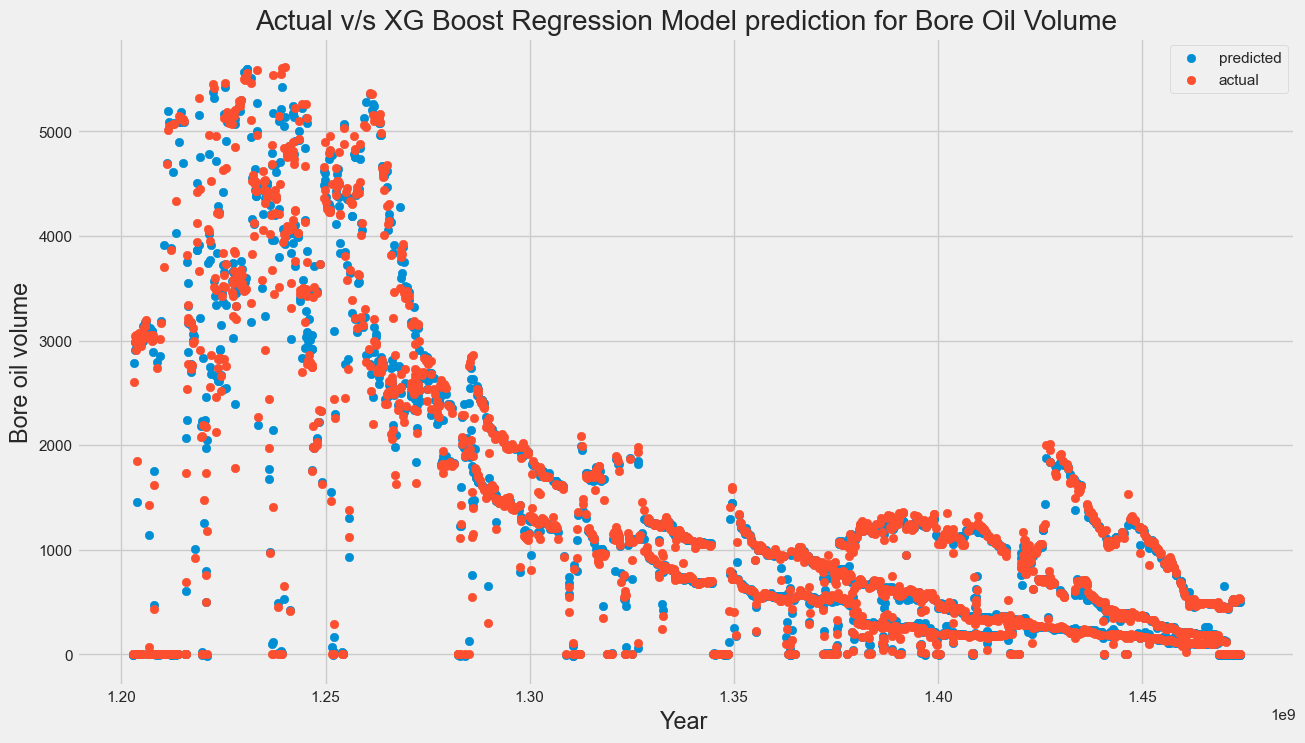

In [53]:
# Plot actual vs predicted values
plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
plt.figure(figsize=(14, 8))
plt.scatter(X_test['DATEPRD'], y_pred_xgb, label='predicted')
plt.scatter(X_test['DATEPRD'], y_test_final, label='actual')
plt.legend()
plt.xlabel("Year ")#represented in terms of 9th power of seconds as we are using unix timestamp
plt.ylabel("Bore oil volume")
plt.title('Actual v/s XG Boost Regression Model prediction for Bore Oil Volume')

# Show plot
plt.show()

### Plotting the Actual vs Predicted values for the wells using XGBoost Regression Model

#### Actual vs Predicted values for the well-5599

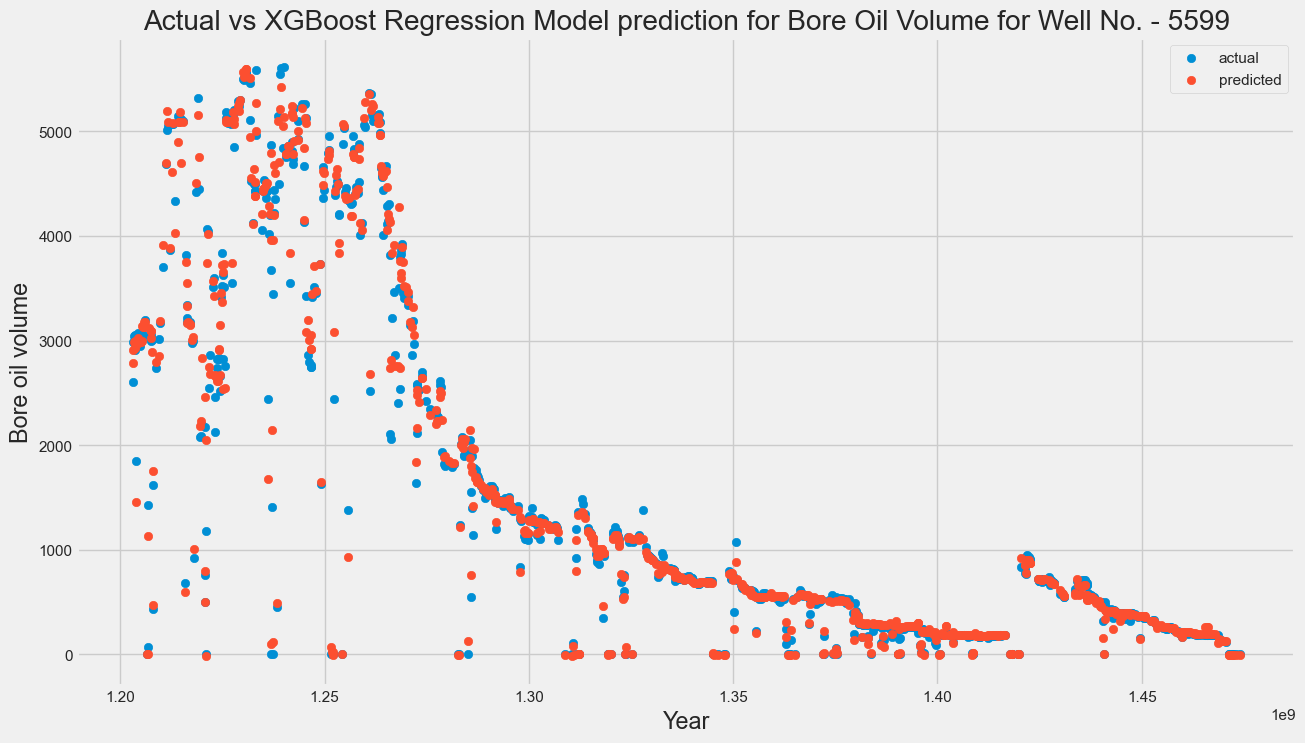

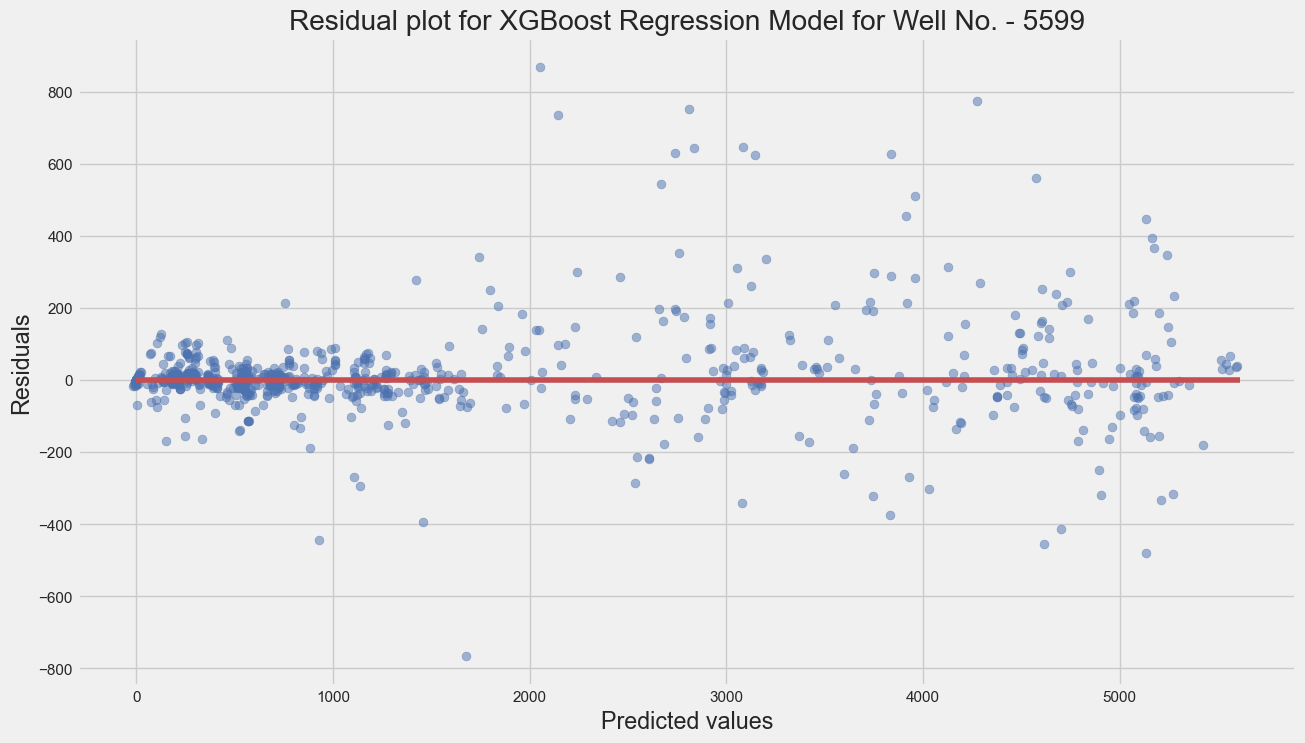

In [54]:
import matplotlib.pyplot as plt

# Select data for well 7405
X_test_5599 = X_test[X_test['NPD_WELL_BORE_CODE'] == 5599]
y_test_5599 = y_test[X_test['NPD_WELL_BORE_CODE'] == 5599]
y_pred_5599 = model.predict(X_test_5599)

# Plot predicted vs actual oil production
plt.figure(figsize=(14, 8))
plt.scatter(X_test_5599['DATEPRD'], y_test_5599, label='actual')
plt.scatter(X_test_5599['DATEPRD'], y_pred_5599, label='predicted')
plt.xlabel('Year')
plt.ylabel('Bore oil volume')
plt.title('Actual vs XGBoost Regression Model prediction for Bore Oil Volume for Well No. - 5599')
plt.legend()
plt.show()

# Plot residual plot
plt.figure(figsize=(14, 8))
plt.scatter(y_pred_5599, y_pred_5599 - y_test_5599, c='b', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=max(y_test_5599), colors='r', zorder=3)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot for XGBoost Regression Model for Well No. - 5599')
plt.show()


#### Actual vs Predicted values for the well-5351

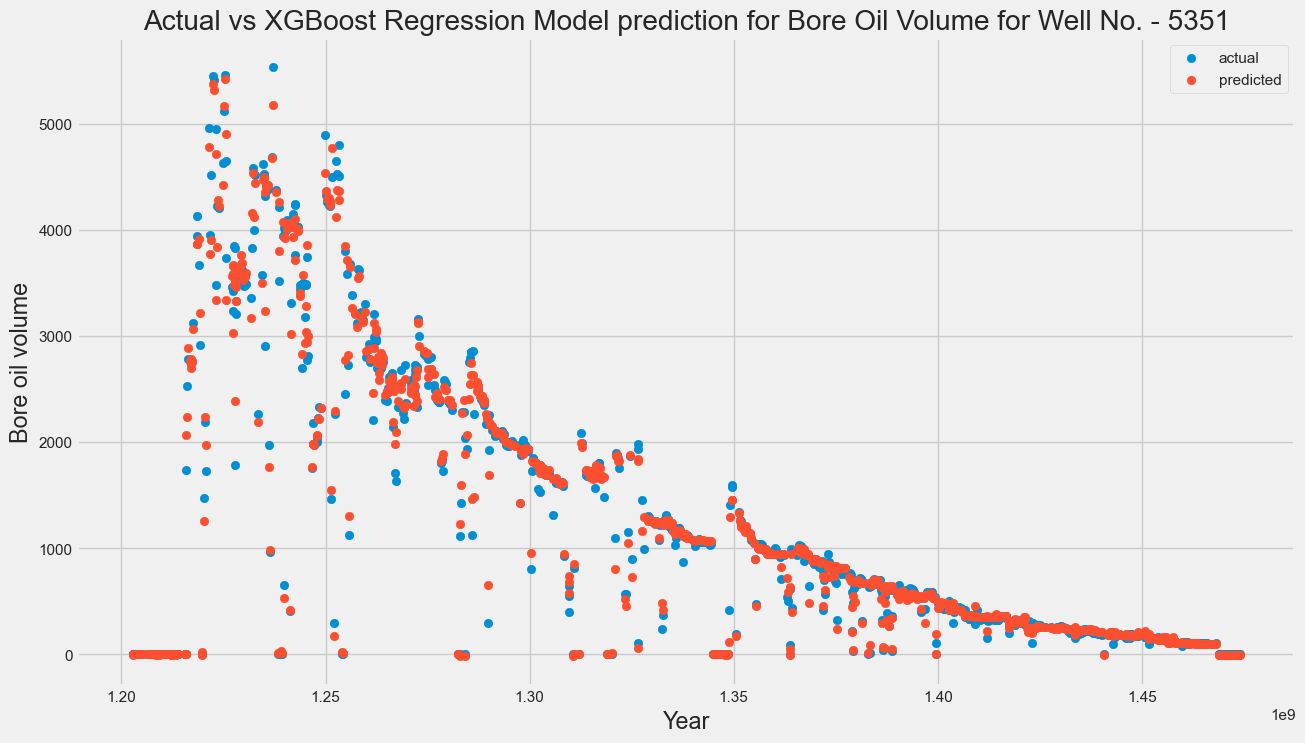

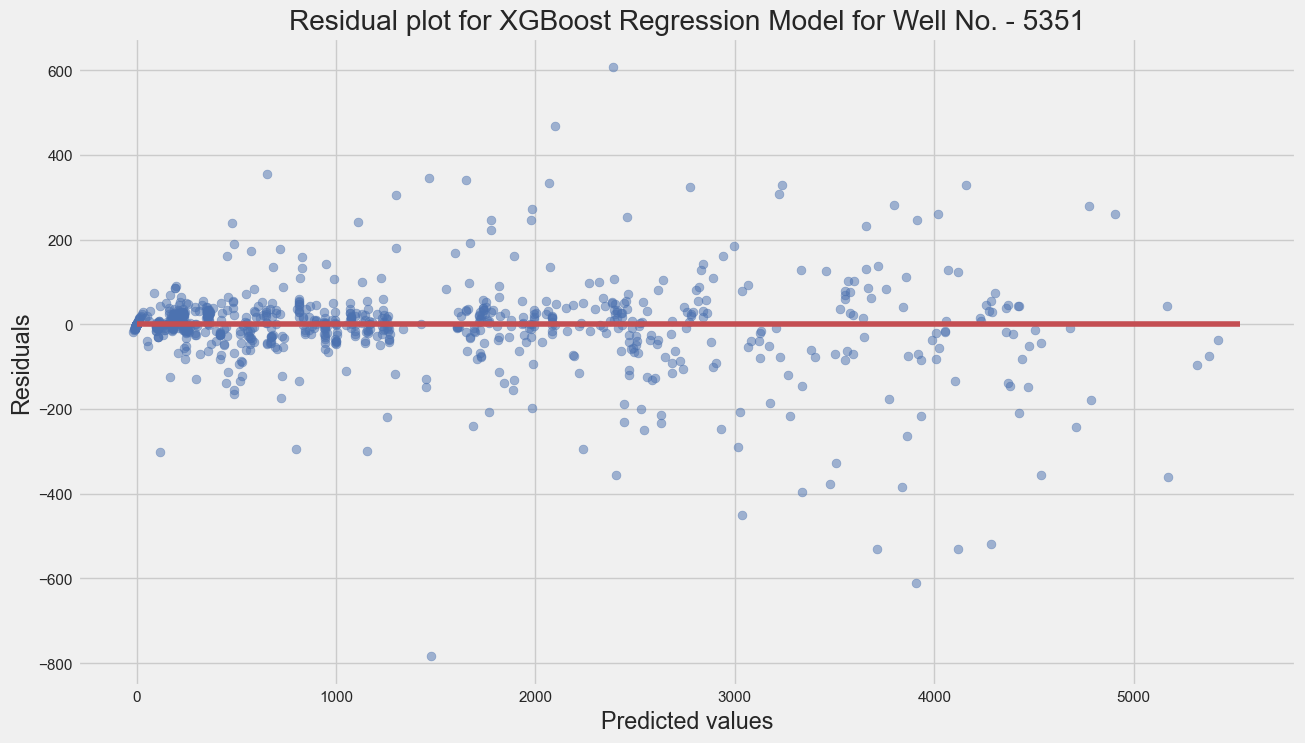

In [55]:
# Select data for well 5351
X_test_5351 = X_test[X_test['NPD_WELL_BORE_CODE'] == 5351]
y_test_5351 = y_test[X_test['NPD_WELL_BORE_CODE'] == 5351]
y_pred_5351 = model.predict(X_test_5351)

# Plot predicted vs actual oil production
plt.figure(figsize=(14, 8))
plt.scatter(X_test_5351['DATEPRD'], y_test_5351, label='actual')
plt.scatter(X_test_5351['DATEPRD'], y_pred_5351, label='predicted')
plt.xlabel('Year')
plt.ylabel('Bore oil volume')
plt.title('Actual vs XGBoost Regression Model prediction for Bore Oil Volume for Well No. - 5351')
plt.legend()
plt.show()

# Plot residual plot
plt.figure(figsize=(14, 8))
plt.scatter(y_pred_5351, y_pred_5351 - y_test_5351, c='b', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=max(y_test_5351), colors='r', zorder=3)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot for XGBoost Regression Model for Well No. - 5351')
plt.show()

#### Actual vs Predicted values for the well-7078

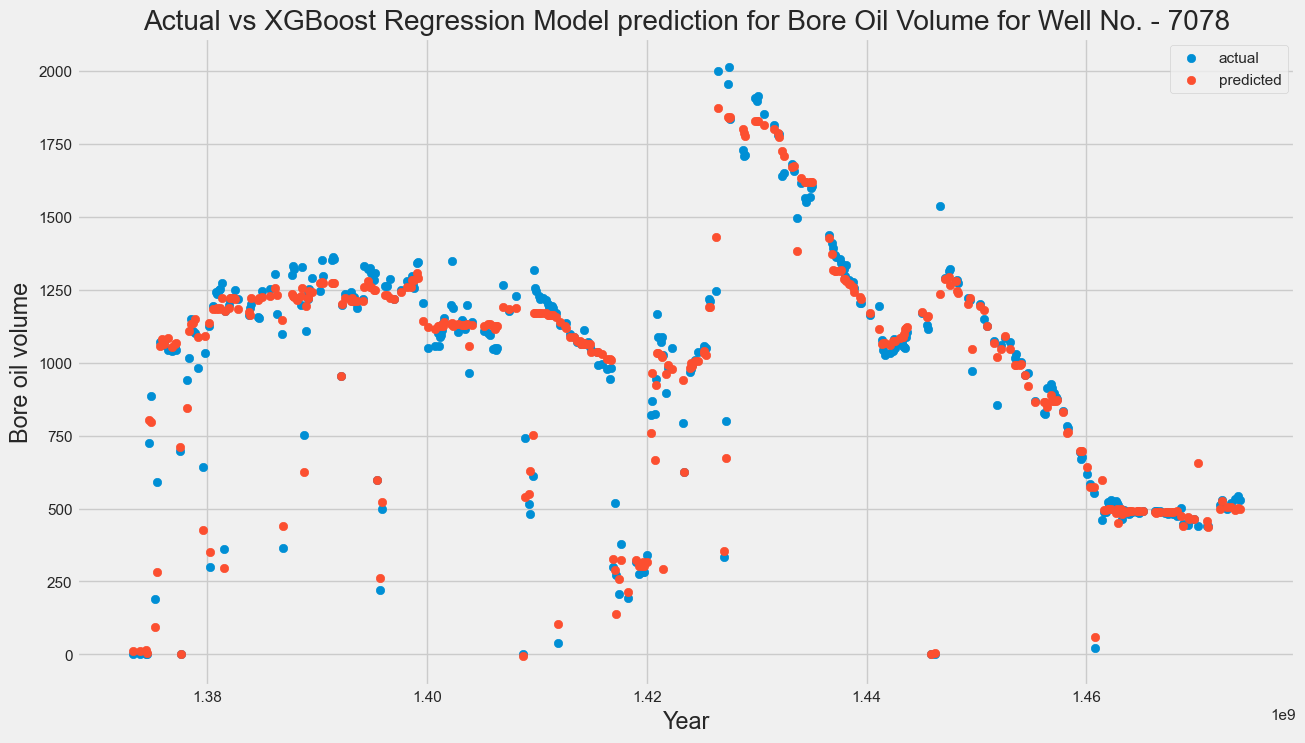

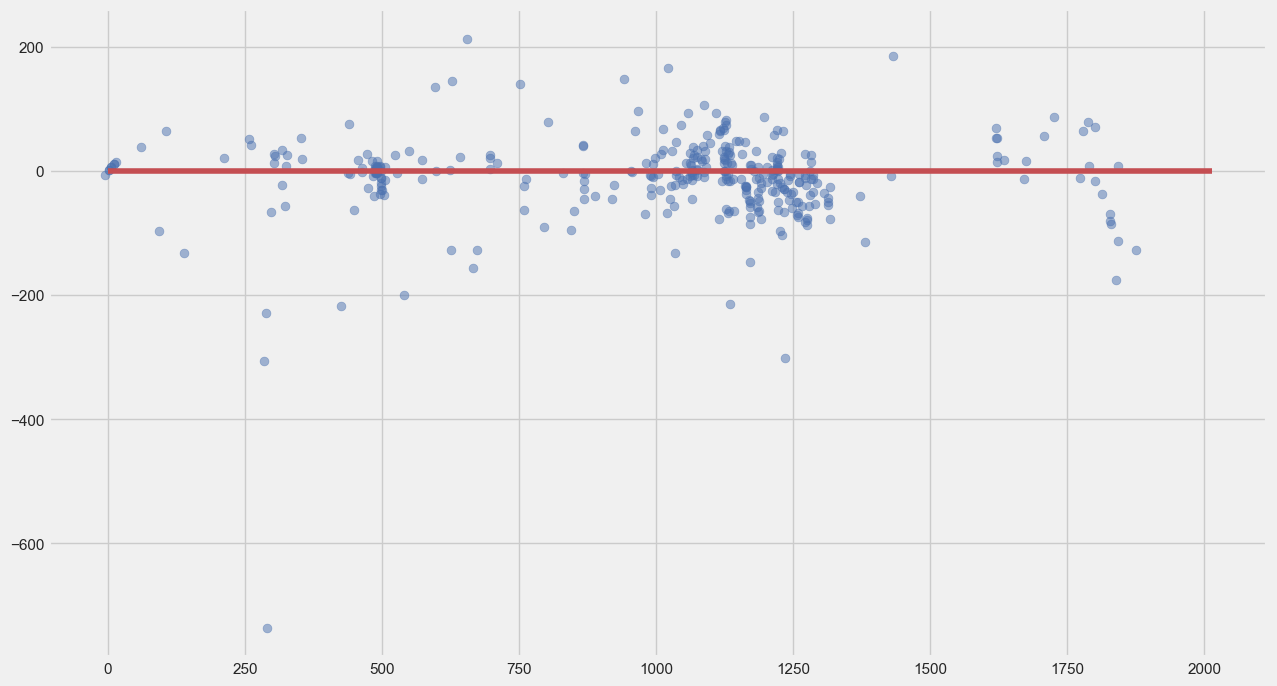

In [56]:
# Select data for well 7078
X_test_7078 = X_test[X_test['NPD_WELL_BORE_CODE'] == 7078]
y_test_7078 = y_test[X_test['NPD_WELL_BORE_CODE'] == 7078]
y_pred_7078 = model.predict(X_test_7078)

# Plot predicted vs actual oil production
plt.figure(figsize=(14, 8))
plt.scatter(X_test_7078['DATEPRD'], y_test_7078, label='actual')
plt.scatter(X_test_7078['DATEPRD'], y_pred_7078, label='predicted')
plt.xlabel('Year')
plt.ylabel('Bore oil volume')
plt.title('Actual vs XGBoost Regression Model prediction for Bore Oil Volume for Well No. - 7078')
plt.legend()
plt.show()

# Plot residual plot
plt.figure(figsize=(14, 8))
plt.scatter(y_pred_7078, y_pred_7078 - y_test_7078, c='b', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=max(y_test_7078), colors='r', zorder=3)


## Random Forest

### Importing the necessary libraries

In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





### Load data

In [58]:
# Load data
df = pd.read_excel('Volve production data.xlsx')

### Round data to nearest integer

In [59]:
df = np.round(df)


### Convert date to Unix timestamp

In [60]:
df['DATEPRD'] = pd.to_datetime(df['DATEPRD'])
df['DATEPRD'] = (df['DATEPRD'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

### Interpolate missing values

In [61]:
cols_to_interpolate = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
                       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE',
                       'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
df[cols_to_interpolate] = df[cols_to_interpolate].interpolate(method='linear')


### Drop unnecessary columns


In [62]:
cols_to_drop = ['WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'NPD_FIELD_NAME', 'NPD_FIELD_CODE', 'NPD_FACILITY_CODE',
                'NPD_FACILITY_NAME', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING', 'BORE_WI_VOL', 'AVG_CHOKE_UOM',
                'FLOW_KIND', 'WELL_TYPE', 'BORE_GAS_VOL']
df.drop(cols_to_drop, axis=1, inplace=True)

### Select data for wells 5351,5599,7078

In [63]:
df = df.loc[df['NPD_WELL_BORE_CODE'].isin([5351, 7078,5599])]

### Prepare data for training


In [64]:
# Prepare data for training
X = df.drop(['BORE_OIL_VOL'], axis=1)
y = df['BORE_OIL_VOL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


### Train model


In [65]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, random_state=42)

### Predict on test set and calculate performance metrics


In [66]:
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test.replace(0, 1e-8) - y_pred) / y_test.replace(0, 1e-8))) * 100

print("The R2 value for Random Forest Regression for oil volume production is", r2)
print("The mean absolute error (MAE) for Random Forest Regression is", mae)
print("The mean squared error (MSE) for Random Forest Regression is", mse)
print("The root mean squared error (RMSE) for Random Forest Regression is", rmse)

The R2 value for Random Forest Regression for oil volume production is 0.9755265282036907
The mean absolute error (MAE) for Random Forest Regression is 122.83331707517738
The mean squared error (MSE) for Random Forest Regression is 45689.43330414476
The root mean squared error (RMSE) for Random Forest Regression is 213.75086737635652


### Plotting the actual vs Predicted values for random Forest Model

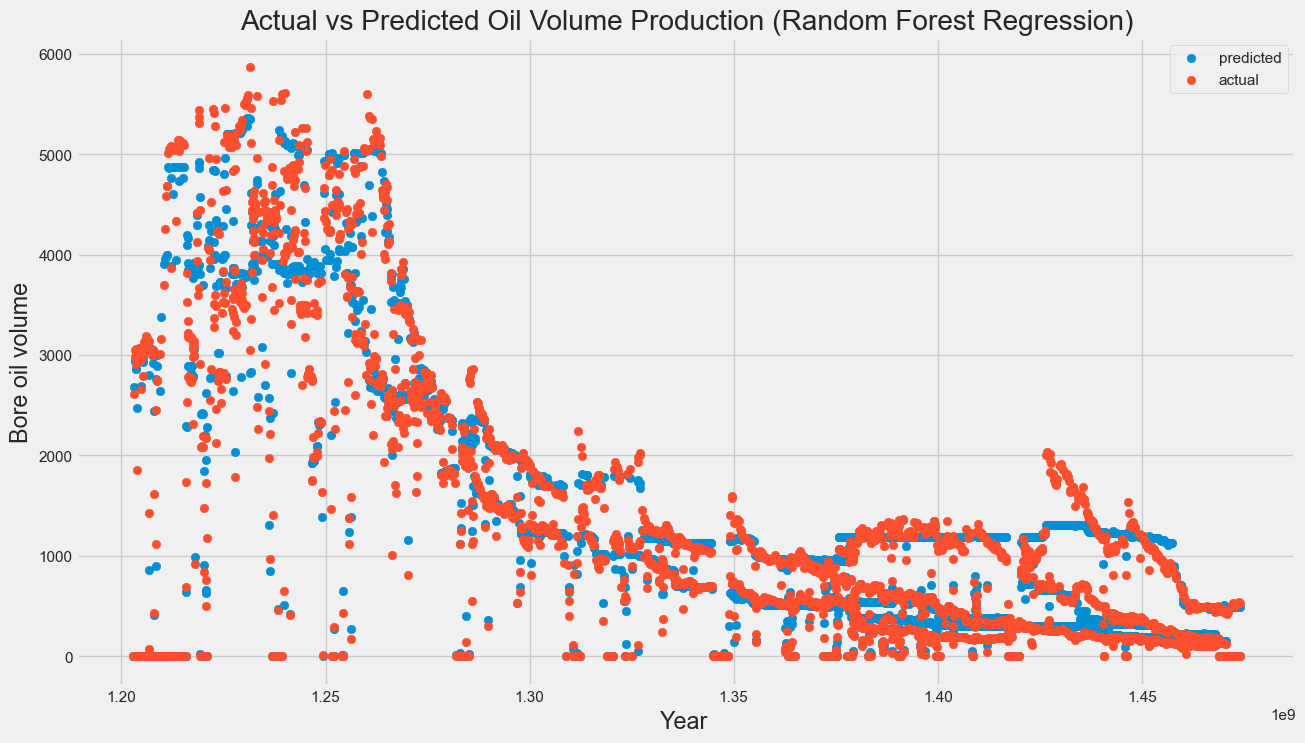

In [67]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')
plt.figure(figsize=(14, 8))
plt.scatter(X_test['DATEPRD'], y_pred, label='predicted')
plt.scatter(X_test['DATEPRD'], y_test, label='actual')
plt.legend()
plt.xlabel("Year ")#represented in terms of 9th power of seconds as we are using unix timestamp
plt.ylabel("Bore oil volume")
plt.title('Actual vs Predicted Oil Volume Production (Random Forest Regression)')

# Show plot
plt.show()


### Plotting the actual vs Predicted values for Each wells

#### Actual VS Predicted values for well-5351

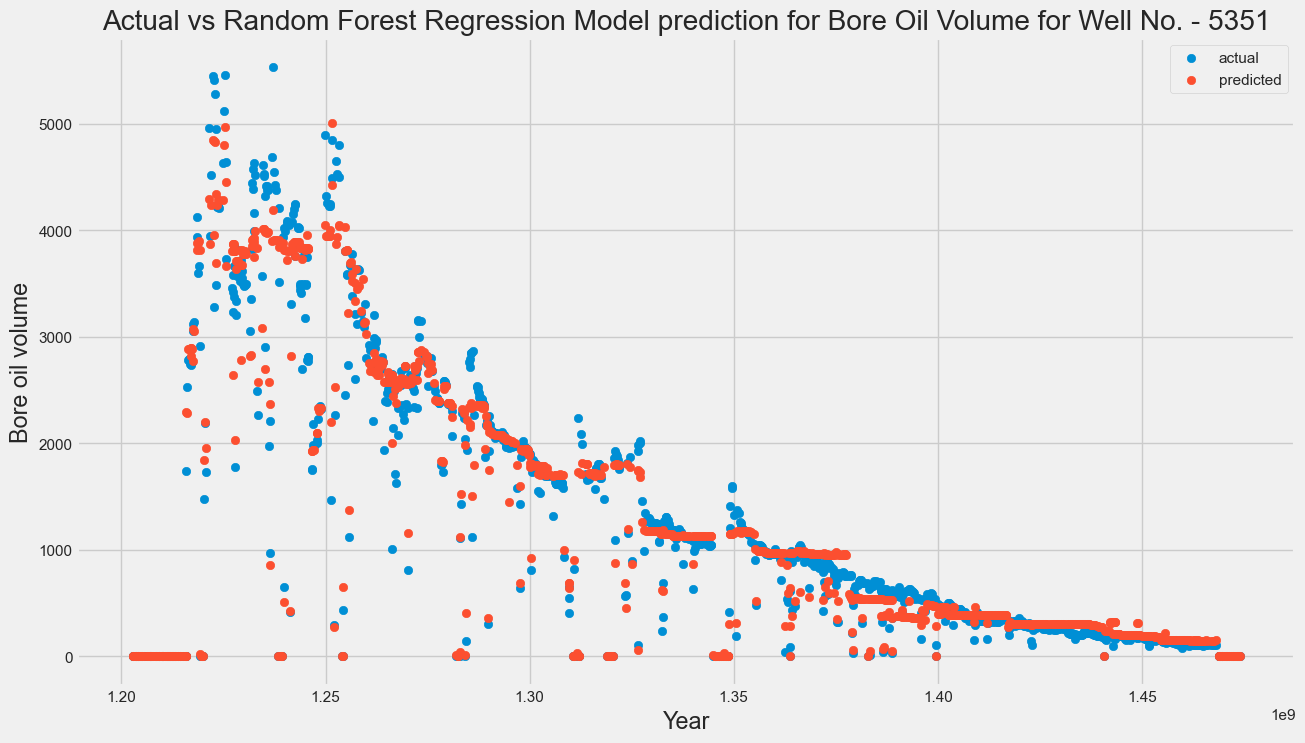

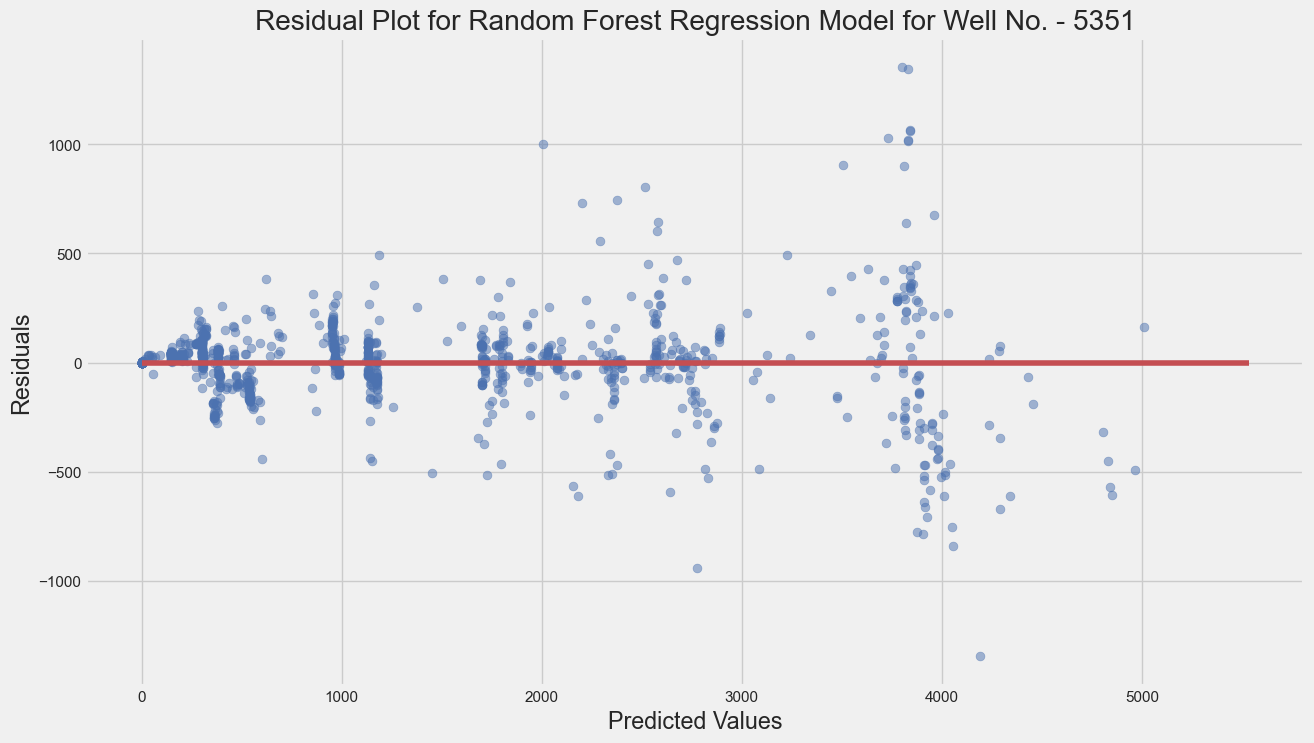

In [68]:
# Select data for well 5351
X_test_5351_rf = X_test[X_test['NPD_WELL_BORE_CODE'] == 5351]
y_test_5351_rf = y_test[X_test['NPD_WELL_BORE_CODE'] == 5351]
y_pred_5351_rf = rf_model.predict(X_test_5351_rf)

# Plot predicted vs actual oil production
plt.figure(figsize=(14, 8))
plt.scatter(X_test_5351_rf['DATEPRD'], y_test_5351_rf, label='actual')
plt.scatter(X_test_5351_rf['DATEPRD'], y_pred_5351_rf, label='predicted')
plt.xlabel('Year')
plt.ylabel('Bore oil volume')
plt.title('Actual vs Random Forest Regression Model prediction for Bore Oil Volume for Well No. - 5351')
plt.legend()
plt.show()

# Plot residual plot
plt.figure(figsize=(14, 8))
plt.scatter(y_pred_5351_rf, y_pred_5351_rf - y_test_5351_rf, c='b', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=max(y_test_5351_rf), colors='r', zorder=3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest Regression Model for Well No. - 5351')
plt.show()

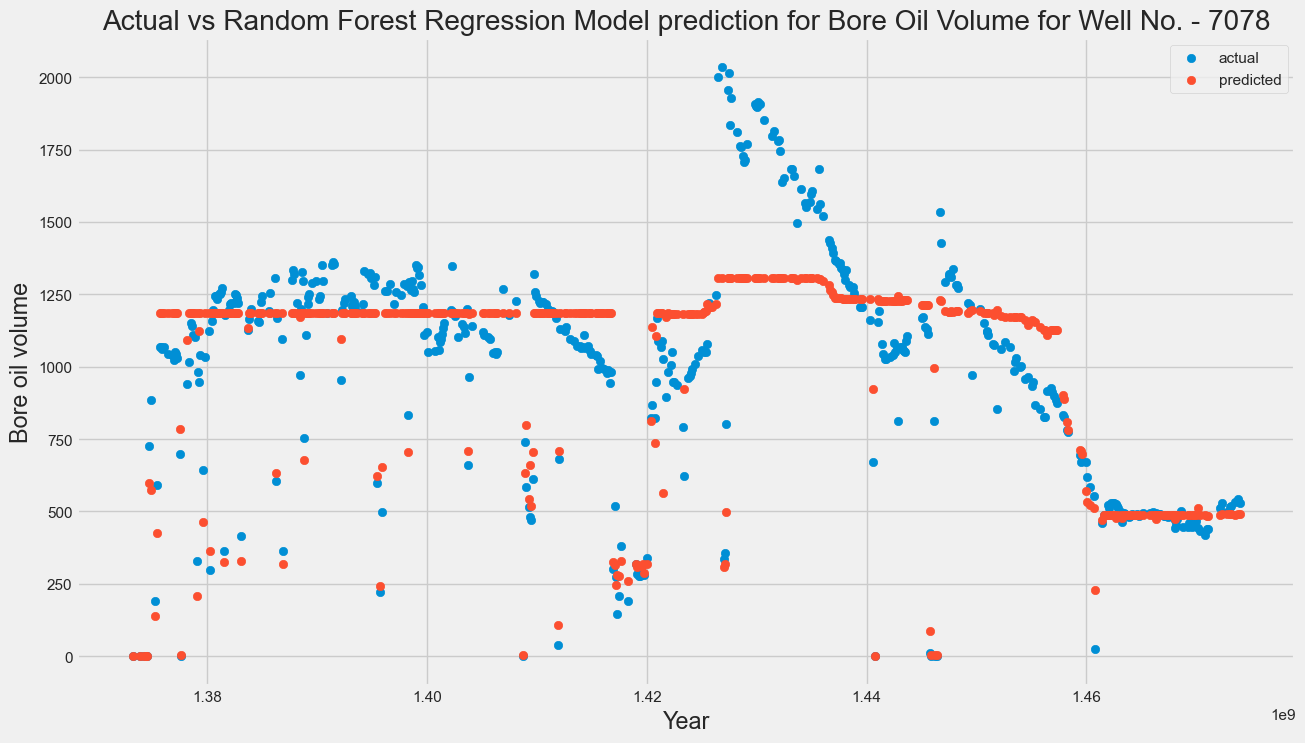

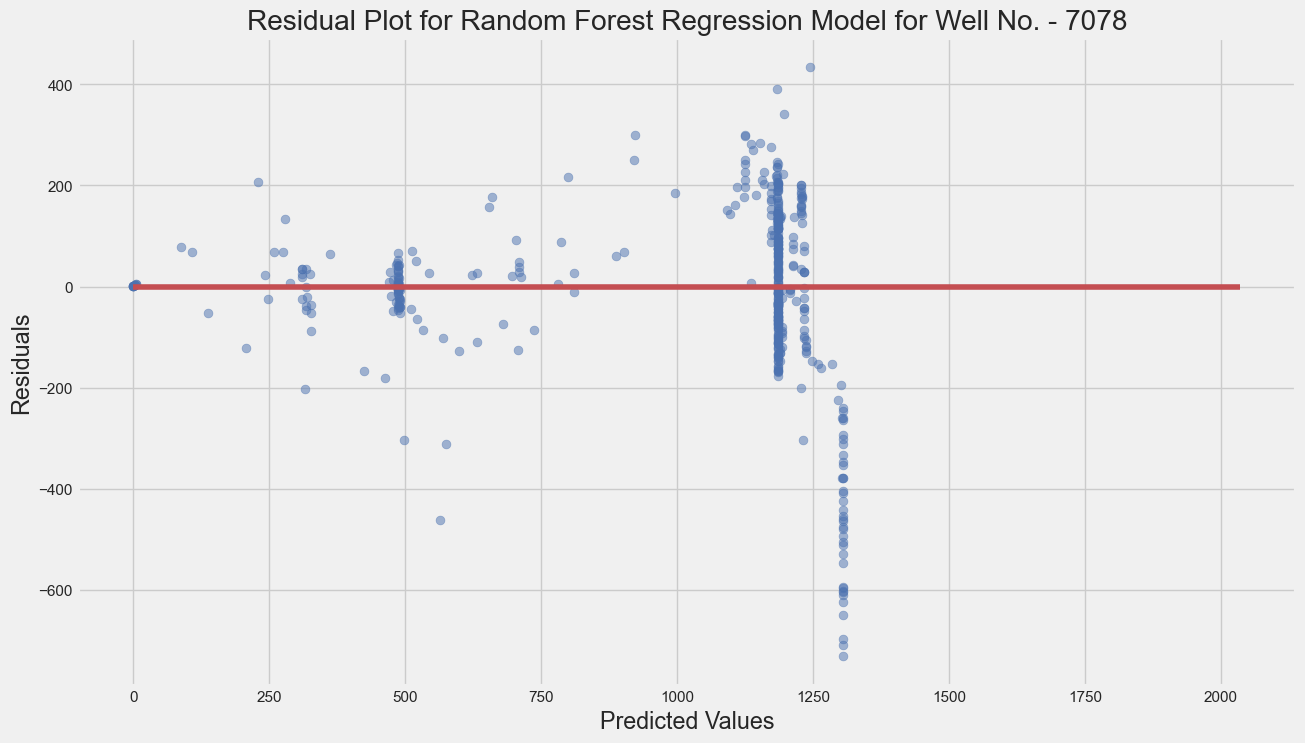

In [69]:
# Select data for well 7078
X_test_7078_rf = X_test[X_test['NPD_WELL_BORE_CODE'] == 7078]
y_test_7078_rf = y_test[X_test['NPD_WELL_BORE_CODE'] == 7078]
y_pred_7078_rf = rf_model.predict(X_test_7078_rf)

# Plot predicted vs actual oil production
plt.figure(figsize=(14, 8))
plt.scatter(X_test_7078_rf['DATEPRD'], y_test_7078_rf, label='actual')
plt.scatter(X_test_7078_rf['DATEPRD'], y_pred_7078_rf, label='predicted')
plt.xlabel('Year')
plt.ylabel('Bore oil volume')
plt.title('Actual vs Random Forest Regression Model prediction for Bore Oil Volume for Well No. - 7078')
plt.legend()
plt.show()

# Plot residual plot
plt.figure(figsize=(14, 8))
plt.scatter(y_pred_7078_rf, y_pred_7078_rf - y_test_7078_rf, c='b', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=max(y_test_7078_rf), colors='r', zorder=3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest Regression Model for Well No. - 7078')
plt.show()


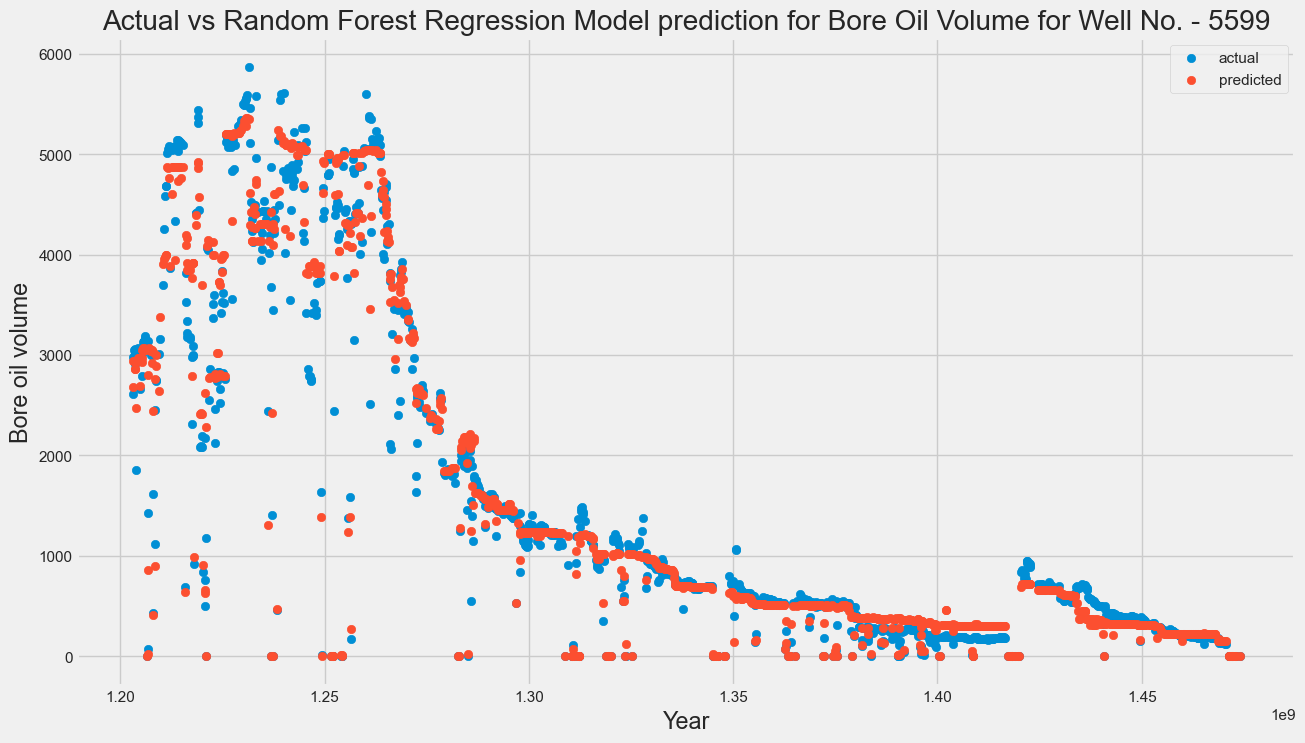

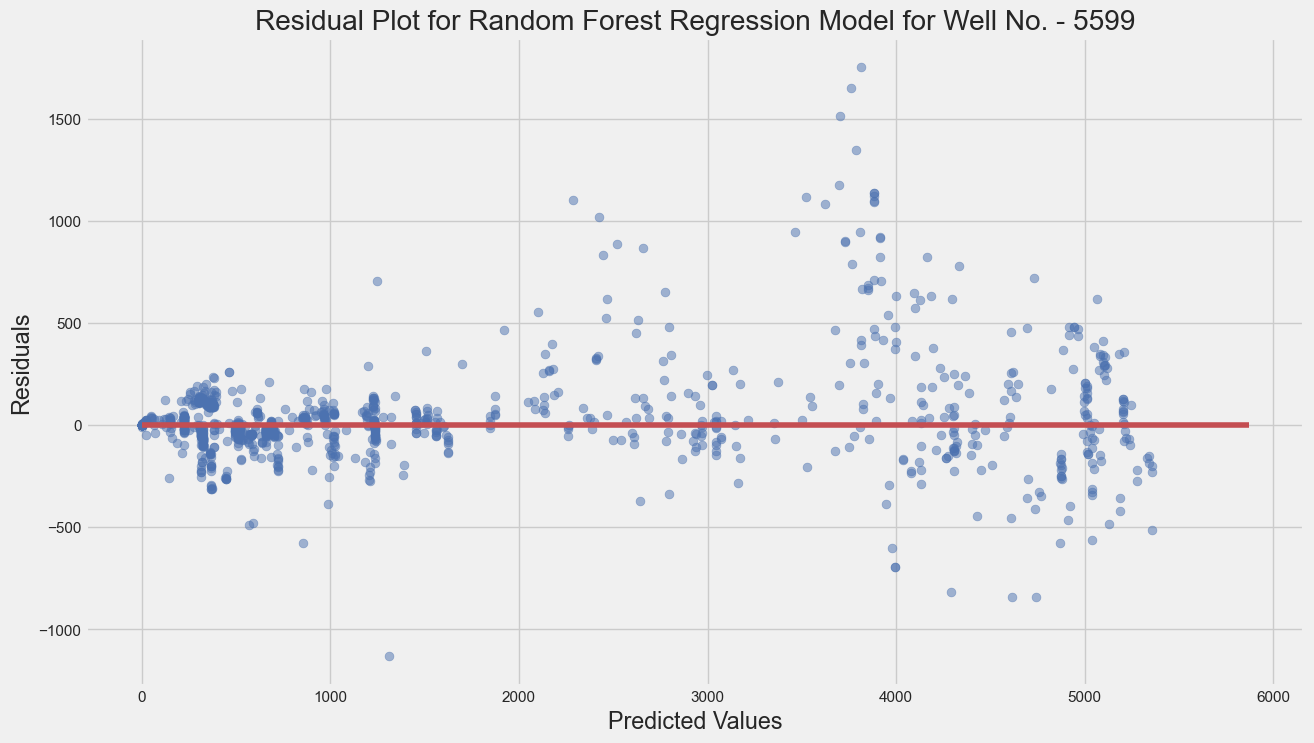

In [70]:
# Select data for well 7405
X_test_5599_rf = X_test[X_test['NPD_WELL_BORE_CODE'] == 5599]
y_test_5599_rf = y_test[X_test['NPD_WELL_BORE_CODE'] == 5599]
y_pred_5599_rf = rf_model.predict(X_test_5599_rf)

# Plot predicted vs actual oil production
plt.figure(figsize=(14, 8))
plt.scatter(X_test_5599_rf['DATEPRD'], y_test_5599_rf, label='actual')
plt.scatter(X_test_5599_rf['DATEPRD'], y_pred_5599_rf, label='predicted')
plt.xlabel('Year')
plt.ylabel('Bore oil volume')
plt.title('Actual vs Random Forest Regression Model prediction for Bore Oil Volume for Well No. - 5599')
plt.legend()
plt.show()

# Plot residual plot
plt.figure(figsize=(14, 8))
plt.scatter(y_pred_5599_rf, y_pred_5599_rf - y_test_5599_rf, c='b', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=max(y_test_5599_rf), colors='r', zorder=3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest Regression Model for Well No. - 5599')
plt.show()

### Comparison of R2 square values

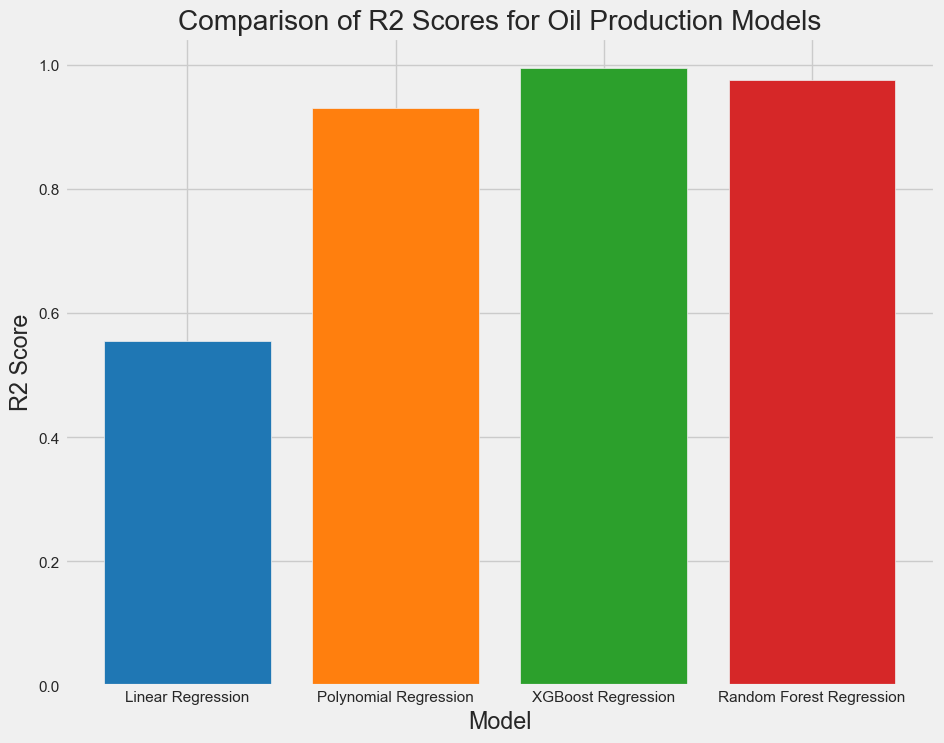

In [71]:
import matplotlib.pyplot as plt

# Define data
models = ['Linear Regression', 'Polynomial Regression', 'XGBoost Regression', 'Random Forest Regression']
r2_scores = [0.5545, 0.9301, 0.9941, 0.9755]

# Set figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Define colors for each model
colors = ['blue', 'green', 'red', 'orange']

# Create bar chart
ax.bar(models, r2_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('R2 Score')
ax.set_title('Comparison of R2 Scores for Oil Production Models')

# Display plot
plt.show()


### Comparing the Mean Absolute Errors Of the Machine Learning Models

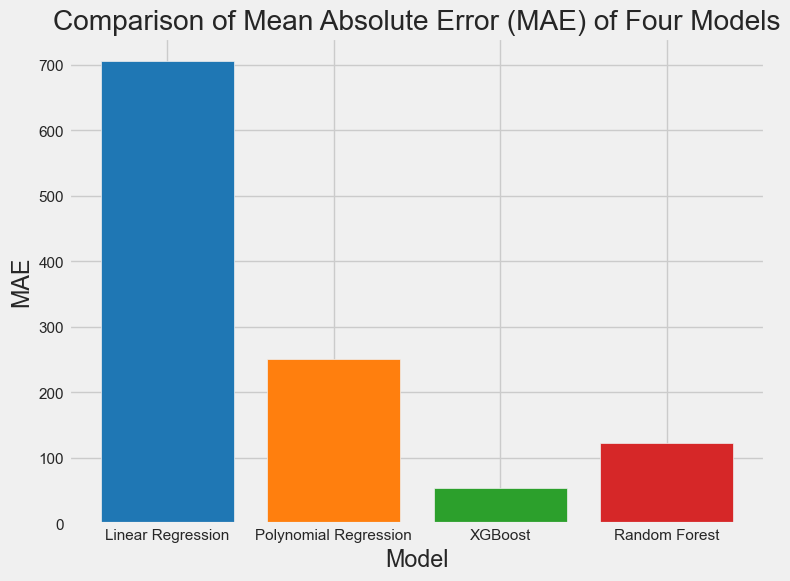

In [72]:
models = ['Linear Regression', 'Polynomial Regression', 'XGBoost', 'Random Forest']
mae = [705.8759, 250.3786, 53.5111, 122.8333]
colors = ['blue', 'green', 'red', 'orange']
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(models, mae, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax.set_title('Comparison of Mean Absolute Error (MAE) of Four Models')
ax.set_xlabel('Model')
ax.set_ylabel('MAE')
plt.show()



### Comparing the Mean Squared Errors of the Machine Learning Models

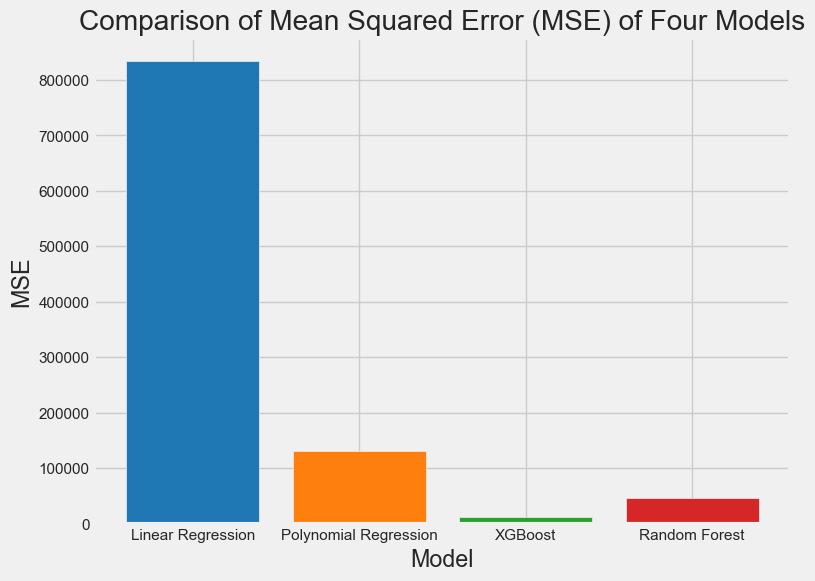

In [73]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'Polynomial Regression', 'XGBoost', 'Random Forest']
mse = [834343.8099, 130862.5409, 11113.8842, 45689.4333]
colors = ['blue', 'green', 'red', 'orange']

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(models, mse, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax.set_title('Comparison of Mean Squared Error (MSE) of Four Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.show()

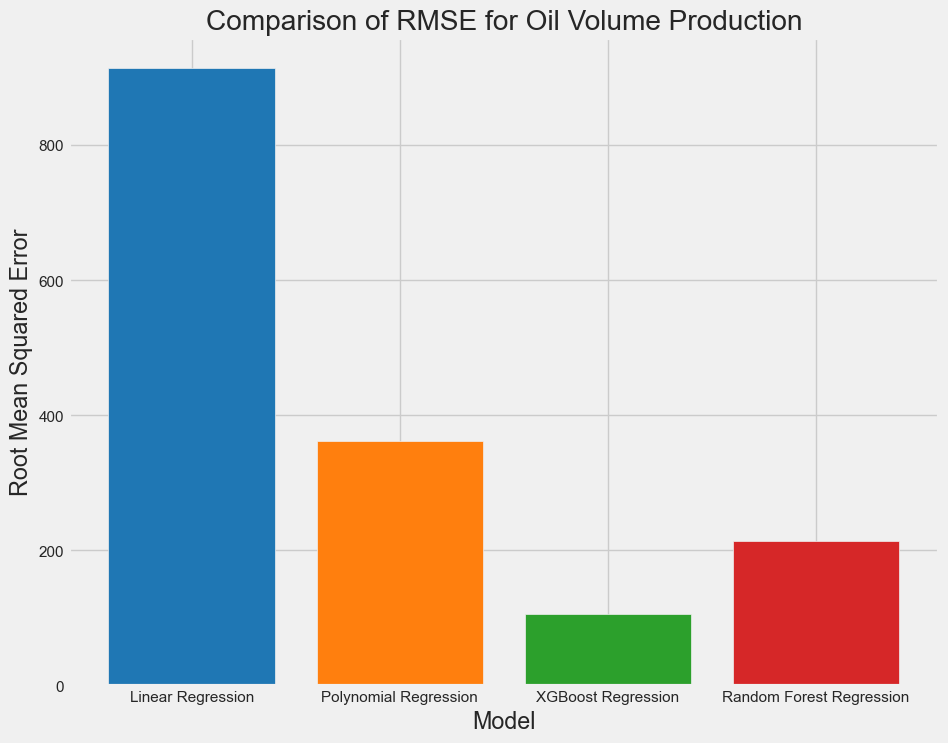

In [74]:
import matplotlib.pyplot as plt

# define the data
models = ['Linear Regression', 'Polynomial Regression', 'XGBoost Regression', 'Random Forest Regression']
rmse = [913.4242, 361.7493, 105.4224, 213.7509]

# set the figure size
plt.figure(figsize=(10, 8))

# create the bar chart
plt.bar(models, rmse, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# add labels and title
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error')
plt.title('Comparison of RMSE for Oil Volume Production')

# display the plot
plt.show()


In [75]:
import plotly.graph_objects as go
import pandas as pd

# Create a dataframe with the performance metrics of the four models
data = {'Model': ['Linear Regression', 'Polynomial Regression', 'XGBoost Regression', 'Random Forest Regression'],
        'R2 Score': [0.55, 0.93, 0.99, 0.98],
        'MAE': [705.88, 250.38, 53.51, 122.83],
        'MSE': [834343.81, 130862.54, 11113.88, 45689.43],
        'RMSE': [913.42, 361.75, 105.42, 213.75]}
df = pd.DataFrame(data)

# Normalize the metrics so they can be plotted on the same scale
df_norm = df.drop('Model', axis=1).apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Create the radar chart
fig = go.Figure()

# Add a trace for each model
for model in df['Model']:
    fig.add_trace(go.Scatterpolar(
        r=df_norm.loc[df['Model'] == model].values.flatten().tolist(),
        theta=df_norm.columns.tolist(),
        fill='toself',
        name=model
    ))

# Set the title and layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True,
    title='Performance Metrics of Four Models',
)

# Show the chart
fig.show()
